<a href="https://colab.research.google.com/github/Pratik94229/Capstone-4/blob/main/Books_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Books Recommendation System



##### **Project Type**    -Unsupervised
##### **Contribution**    - Individual
##### **Name -** Pratik Thorat


# **GitHub Link -**

https://github.com/Pratik94229/Capstone-4

# **Problem Statement**


* During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such web services, recommender systems have taken more and more place in our lives. From e-commerce (suggest to buyers articles that could interest them) to online advertisement (suggest to users the right contents, matching their preferences), recommender systems are today unavoidable in our daily online journeys.

* In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy, or anything else depending on industries). Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors. The main objective is to create a book recommendation system for users.

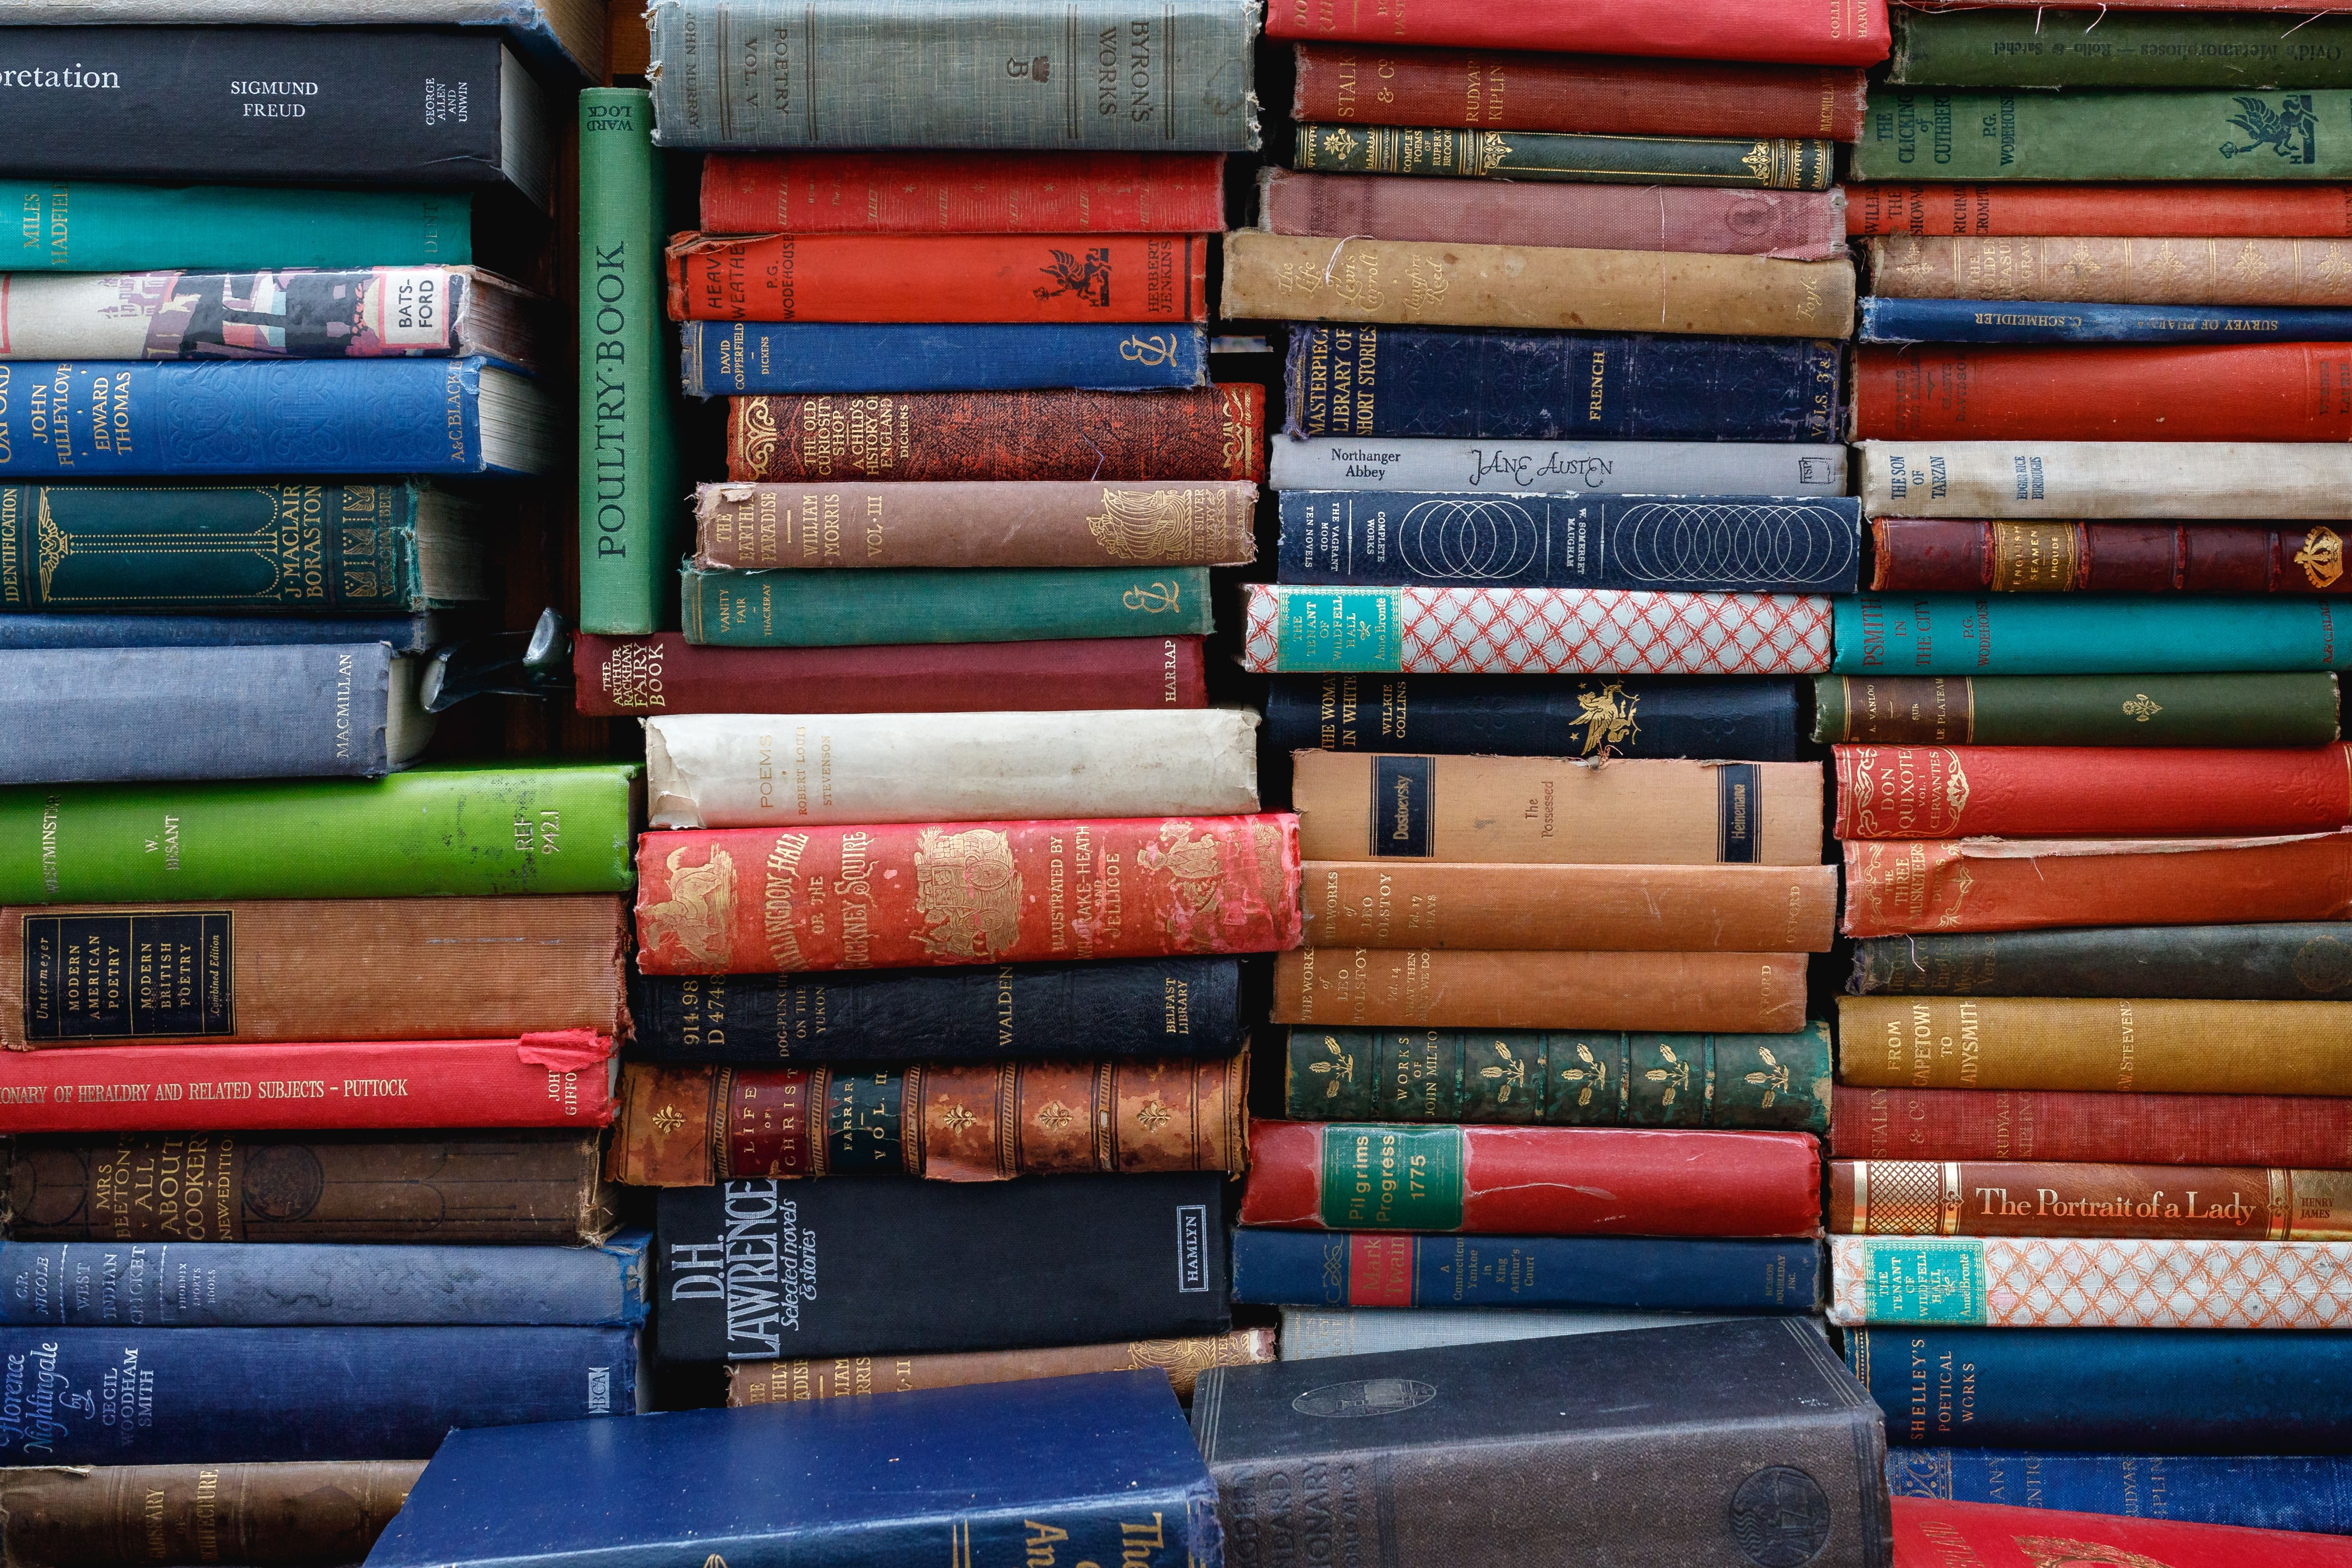

# **Project Summary -**


> The project focuses on the development of a hybrid Book Recommender System by leveraging books data, ratings data, and user data. The system aims to provide personalized book recommendations to users based on their preferences, utilizing a combination of collaborative filtering techniques and matrix factorization.The project workflow begins with Exploratory Data Analysis (EDA) on the provided datasets. This step involves understanding the data structure, identifying patterns, and gaining insights into the books, ratings, and user profiles.

Next, various recommendation algorithms are implemented to enhance the accuracy and effectiveness of the system. These algorithms include

 *  **1)Popularity-Based Recommender System:** This algorithm recommends books based on their overall popularity or trending factor, ensuring that popular titles are highlighted to users.

 * **2)Item-Item Collaborative Filtering:** By analyzing similarities between books based on user ratings, this algorithm suggests books that are similar to the ones a user has already enjoyed, focusing on the user's specific interests.

* **3)User-User Collaborative Filtering:** This algorithm identifies similar users based on their book preferences and recommends books that have been well-received by users with similar tastes and preferences.

* **4)Matrix Factorization:** By decomposing the user-book rating matrix, this algorithm uncovers latent features and preferences. It recommends books that align with a user's unique interests and preferences, providing a novel and personalized recommendation experience.

To evaluate the performance of the implemented models, the surprise library is utilized. This evaluation assesses the accuracy and reliability of the recommendation algorithms, allowing for fine-tuning and improvements.

Finally, a hybrid recommender system is developed by assigning weighted values to each algorithm's output. The hybrid system combines the following factors:
* Trending Factor (20% weightage): Recommendations based on overall popularity and trending books.
* Interest based Factor for Item-Based Collaborative Filtering (20% weightage): Recommendations based on similarities to previously enjoyed books.
* Interest based Factor for User-Based Filtering (30% weightage): * Recommendations based on similarities to users with similar preferences.
* Novelty Factor for Matrix Factorization (40% weightage): Recommendations based on latent features and preferences to provide novel suggestions.

The hybrid system aims to deliver highly personalized recommendations by combining multiple recommendation techniques, catering to diverse user interests and preferences.

# ***Let's Begin !***

In [432]:
# For checking progress of Python code execution
!pip install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [433]:
!pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## ***1. Know Your Data***

### Import Libraries

In [434]:
# Import Libraries
import pandas as pd
import numpy as np
import math 
import datetime
import itertools

#for data visualization
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

#for collaborative filtering
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix
from scipy.spatial.distance import correlation 

#Time remaining in for loop.
from time import sleep
from tqdm import tqdm

#For model implementation using surprise library

from surprise import accuracy,Reader, Dataset,KNNBasic, SVD, NMF
from surprise import SVD, NMF, SlopeOne, KNNBasic, KNNWithMeans, KNNBaseline, CoClustering, BaselineOnly, NormalPredictor
from surprise.model_selection import GridSearchCV, cross_validate,train_test_split
 

#For ignoring warnings
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [435]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [436]:
#reading dataset
working_dir='/content/drive/MyDrive/Colab Notebooks/Module 4/Capstone 4/'
books_df=pd.read_csv(working_dir+'Books.csv',low_memory=False)
ratings_df=pd.read_csv(working_dir+'Ratings.csv')
users_df=pd.read_csv(working_dir+'Users.csv')


### Dataset First View

In [437]:
# Dataset First Look
books_df.head(3)

ISBN            Book-Title           Book-Author Year-Of-Publication  \
0  0195153448   Classical Mythology    Mark P. O. Morford                2002   
1  0002005018          Clara Callan  Richard Bruce Wright                2001   
2  0060973129  Decision in Normandy          Carlo D'Este                1991   

                 Publisher                                        Image-URL-S  \
0  Oxford University Press  http://images.amazon.com/images/P/0195153448.0...   
1    HarperFlamingo Canada  http://images.amazon.com/images/P/0002005018.0...   
2          HarperPerennial  http://images.amazon.com/images/P/0060973129.0...   

                                         Image-URL-M  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   

                                         Image-URL-L  
0  http://images.amazon.com/images/P/0195153448.0...  
1  http://images.amazon.com/images/P/0002005018.0...  
2  http://images.amazon.com/images/P/0060973129.0...

In [438]:
#first look
ratings_df.head(3)

User-ID        ISBN  Book-Rating
0   276725  034545104X            0
1   276726  0155061224            5
2   276727  0446520802            0

In [439]:
#first look
users_df.head(3)

User-ID                         Location   Age
0        1               nyc, new york, usa   NaN
1        2        stockton, california, usa  18.0
2        3  moscow, yukon territory, russia   NaN

### Dataset Rows & Columns count

In [440]:
# Dataset Rows & Columns count
dict_df={'books':books_df,'ratings':ratings_df,'users':users_df}
for key in dict_df.keys():
  print(f'---------------------------------\n{key} dataframe rows and columns:\n{dict_df[key].shape}')


---------------------------------
books dataframe rows and columns:
(271360, 8)
---------------------------------
ratings dataframe rows and columns:
(1149780, 3)
---------------------------------
users dataframe rows and columns:
(278858, 3)


### Dataset Information

In [441]:
# Dataset Info
for key in dict_df.keys():
  print(f'-------------Info of {key} dataframe------------------\n\n\n{dict_df[key].info()}')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB
-------------Info of books dataframe------------------


None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2 

#### Duplicate Values

In [442]:
# Dataset Duplicate Value Count
for key in dict_df.keys():
  print(f'################### Duplicates in {key} ###################\n\n\n{dict_df[key][dict_df[key].duplicated()].count()}\n\n')


################### Duplicates in books ###################


ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64


################### Duplicates in ratings ###################


User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


################### Duplicates in users ###################


User-ID     0
Location    0
Age         0
dtype: int64




#### Missing Values/Null Values

In [443]:
# Missing Values/Null Values Count
for key in dict_df.keys():
  print(f'################### Missing values in {key} dataframe ###################\n\n\n{dict_df[key].isna().sum()}\n')




################### Missing values in books dataframe ###################


ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

################### Missing values in ratings dataframe ###################


User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

################### Missing values in users dataframe ###################


User-ID          0
Location         0
Age         110762
dtype: int64



<Axes: >

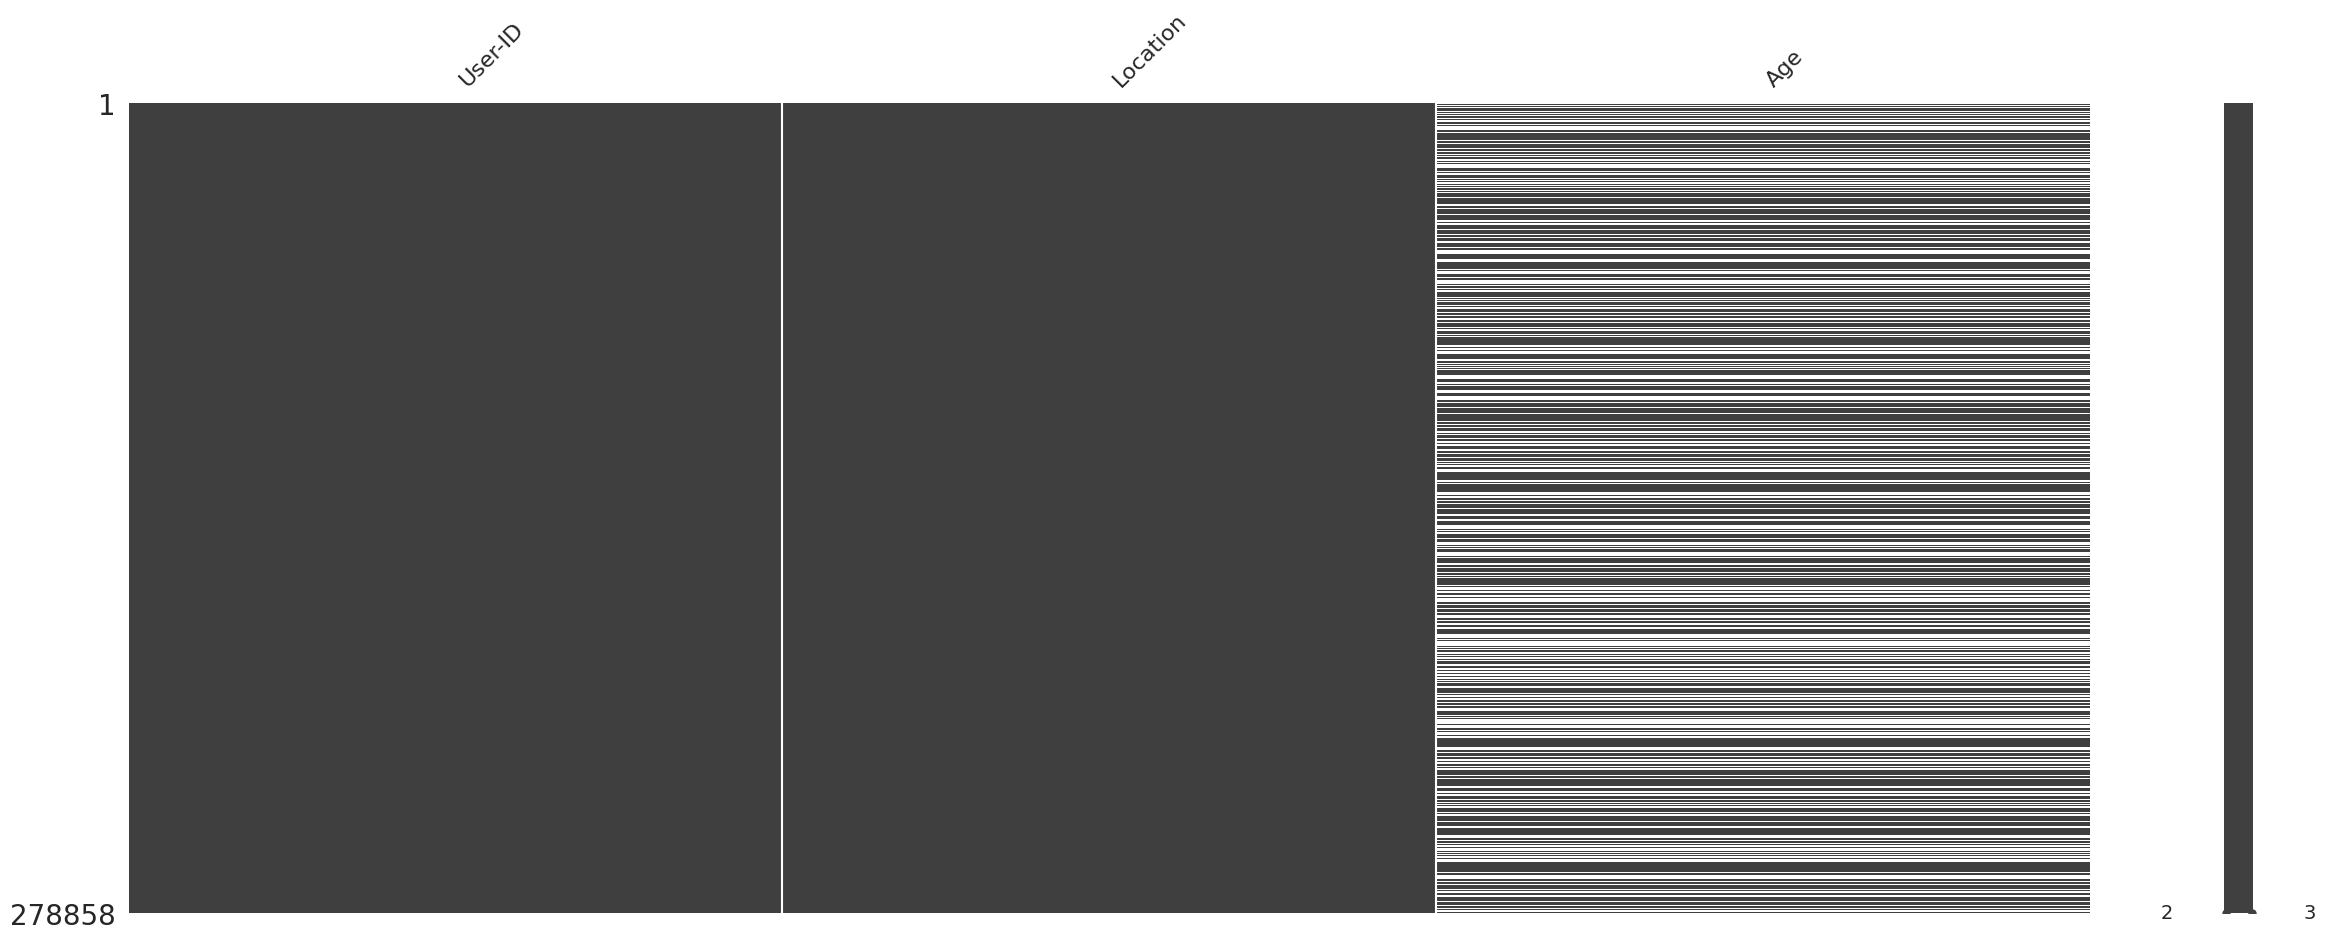

In [444]:
# Visualizing the missing values in users dataframe
msno.matrix(users_df)

In [445]:
#Handling missing and null values in book dataframe
books_df['Publisher'].fillna('Unknown', inplace=True)



In [446]:
#Handling missing and null values in ratings dataframe
ratings_df['Book-Rating'].fillna(0, inplace=True)

In [447]:
#Handling missing and null values in users dataframe
#users_df.dropna(inplace=True)
users_df['Age'].fillna(users_df['Age'].median(), inplace=True)

In [448]:
#Again Checking  Missing Values/Null Values Count
for key in dict_df.keys():
  print(f'######################### Missing values in {key} dataframe #########################\n\n\n{dict_df[key].isna().sum()}\n')


######################### Missing values in books dataframe #########################


ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

######################### Missing values in ratings dataframe #########################


User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

######################### Missing values in users dataframe #########################


User-ID     0
Location    0
Age         0
dtype: int64



### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [449]:
# Dataset 
for key in dict_df.keys():
  print(f'########################  Columns in {key} dataframe   ########################\n\n\n{dict_df[key].columns}\n\n')

########################  Columns in books dataframe   ########################


Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')


########################  Columns in ratings dataframe   ########################


Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')


########################  Columns in users dataframe   ########################


Index(['User-ID', 'Location', 'Age'], dtype='object')




In [450]:
# Dataset Describe
for key in dict_df.keys():
  print(f'----------------Description of {key} dataframe-------------------------\n\n\n{dict_df[key].describe()}\n\n')

----------------Description of books dataframe-------------------------


              ISBN      Book-Title      Book-Author Year-Of-Publication  \
count       271360          271360           271359              271360   
unique      271360          242135           102023                 118   
top     0195153448  Selected Poems  Agatha Christie                2002   
freq             1              27              632               17627   

        Publisher                                        Image-URL-S  \
count      271360                                             271360   
unique      16807                                             271044   
top     Harlequin  http://images.amazon.com/images/P/185326119X.0...   
freq         7535                                                  2   

                                              Image-URL-M  \
count                                              271360   
unique                                             271044   
top   

### Variables Description 

**1) Users dataframe**:

* Contains the users. 

   (Note that user IDs (User-ID) have been anonymized and map to integers.)
*  Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL values.

**2) Books dataframe**:

* Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. 
* Moreover, some content-based information is given (Book-Title, Book-Author, Year-Of- Publication, Publisher), obtained from Amazon Web Services.
  
  (Note that in the case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavours (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLS point to the Amazon website.)

**3) Ratings**:

Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.

### Check Unique Values for each variable.

In [451]:
# Check Unique Values for each variable.
for key in dict_df.keys():
  print(f'--------------Unique values in {key} dataframe-------------------------\n\n\n{dict_df[key].nunique()}\n\n')

--------------Unique values in books dataframe-------------------------


ISBN                   271360
Book-Title             242135
Book-Author            102023
Year-Of-Publication       118
Publisher               16807
Image-URL-S            271044
Image-URL-M            271044
Image-URL-L            271041
dtype: int64


--------------Unique values in ratings dataframe-------------------------


User-ID        105283
ISBN           340556
Book-Rating        11
dtype: int64


--------------Unique values in users dataframe-------------------------


User-ID     278858
Location     57339
Age            165
dtype: int64




## 3. ***Data Wrangling***

### Data Wrangling Code

In [452]:
# Write your code to make your dataset analysis ready.
merged_dataset= ratings_df.merge(books_df,on='ISBN')
merged_dataset=merged_dataset.merge(users_df,on='User-ID')

In [453]:
merged_dataset[merged_dataset['Year-Of-Publication']=='DK Publishing Inc']

User-ID        ISBN  Book-Rating  \
85425    130571  0789466953            0   
346284   227771  078946697X            7   
594299   169663  078946697X            0   

                                               Book-Title Book-Author  \
85425   DK Readers: Creating the X-Men, How Comic Book...        2000   
346284  DK Readers: Creating the X-Men, How It All Beg...        2000   
594299  DK Readers: Creating the X-Men, How It All Beg...        2000   

       Year-Of-Publication                                          Publisher  \
85425    DK Publishing Inc  http://images.amazon.com/images/P/0789466953.0...   
346284   DK Publishing Inc  http://images.amazon.com/images/P/078946697X.0...   
594299   DK Publishing Inc  http://images.amazon.com/images/P/078946697X.0...   

                                              Image-URL-S  \
85425   http://images.amazon.com/images/P/0789466953.0...   
346284  http://images.amazon.com/images/P/078946697X.0...   
594299  http://images.amazon.com/images/P/078946697X.0...   

                                              Image-URL-M Image-URL-L  \
85425   http://images.amazon.com/images/P/0789466953.0...         NaN   
346284  http://images.amazon.com/images/P/078946697X.0...         NaN   
594299  http://images.amazon.com/images/P/078946697X.0...         NaN   

                                Location   Age  
85425   summerville, south carolina, usa  32.0  
346284               savion, n/a, israel  19.0  
594299             towson, maryland, usa  32.0

In [454]:
merged_dataset[merged_dataset['Year-Of-Publication']=='Gallimard']

User-ID        ISBN  Book-Rating  \
402556   137190  2070426769            0   

                                               Book-Title Book-Author  \
402556  Peuple du ciel, suivi de 'Les Bergers\";Jean-M...        2003   

       Year-Of-Publication                                          Publisher  \
402556           Gallimard  http://images.amazon.com/images/P/2070426769.0...   

                                              Image-URL-S  \
402556  http://images.amazon.com/images/P/2070426769.0...   

                                              Image-URL-M Image-URL-L  \
402556  http://images.amazon.com/images/P/2070426769.0...         NaN   

                        Location   Age  
402556  rennes, bretagne, france  31.0

In [455]:
# Create a dictionary mapping each unique value in the 'City' column to an integer
year_map = {'DK Publishing Inc': 2000,'Gallimard':2003}

# Replace the values in the 'City' column with their corresponding integer values
merged_dataset['Year-Of-Publication'] = merged_dataset['Year-Of-Publication'].replace(year_map)

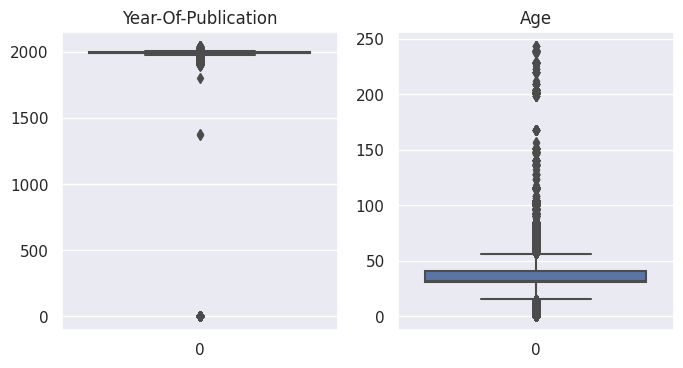

In [456]:
# checking Outliers with seaborn boxplot
check_outlier=['Year-Of-Publication','Age']
n =0
plt.figure(figsize=(7,7))
for i in check_outlier:
  if n<10:
    n=n+1
  plt.subplot(2,2,n)
  sns.boxplot(merged_dataset[i],whis=1.5)
  plt.title(i)
  plt.tight_layout()

In [457]:
# Replacing age values above 90 with the mean value of the age column

 # Calculating the mean value for all values which are less than 90
mean_age = merged_dataset['Age'][merged_dataset['Age'] < 90].mean() 


# Replacimg the values which are above 90 and below 10 with mean values
merged_dataset.loc[merged_dataset['Age'] < 10, 'Age'] = mean_age  
merged_dataset.loc[merged_dataset['Age'] > 90, 'Age'] = mean_age  

In [458]:
# Replacing year values with the mean value of the year column

#typecasting Year-Of-Publication column from string to numerical format 
merged_dataset['Year-Of-Publication'] = pd.to_numeric(merged_dataset['Year-Of-Publication'], errors='coerce')

# Calculating the most frequent value occuring in column
most_frequent_value = merged_dataset['Year-Of-Publication'].value_counts().idxmax()

#replacing all the values in year column which are below 1900 and above 2017 with most frequent value.
merged_dataset.loc[merged_dataset['Year-Of-Publication'] < 1900, 'Year-Of-Publication'] = most_frequent_value   # Replace the values
merged_dataset.loc[merged_dataset['Year-Of-Publication'] > 2017, 'Year-Of-Publication'] = most_frequent_value   # Replace the values

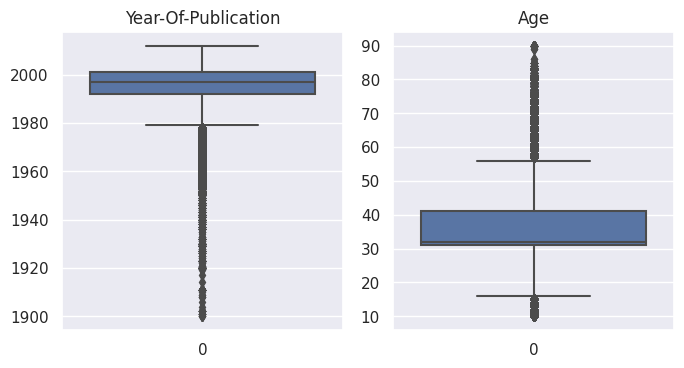

In [459]:
# checking Outliers with seaborn boxplot
check_outlier=['Year-Of-Publication','Age']
n =0
plt.figure(figsize=(7,7))
for i in check_outlier:
  if n<10:
    n=n+1
  plt.subplot(2,2,n)
  sns.boxplot(merged_dataset[i],whis=1.5)
  plt.title(i)
  plt.tight_layout()

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#<b>Insights about books data.

#1) Top 10 rated books.

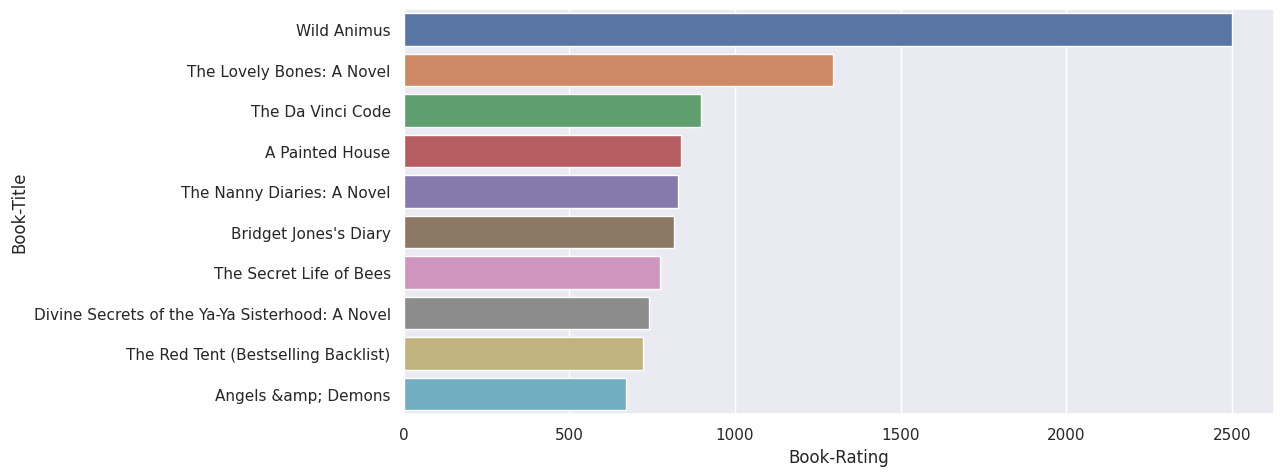

In [460]:
# Chart - 1 visualization code

#counting most rated books
top_rated_books = merged_dataset.groupby(['Book-Title'])['Book-Rating'].count().reset_index().sort_values(['Book-Rating'], ascending=False).head(10)

#creating bar plot of above result
sns.barplot(x='Book-Rating', y='Book-Title', data=top_rated_books)
plt.show()

##### 1. Why did you pick the specific chart?

 Bar graph summarises the large set of data in simple visual form. It displays each category of data in the frequency distribution. It clarifies the trend of data better than the table. It helps in estimating the key values at a glance. As we are comparing customer churn rate with total number of customers so grouped bar chart is making it easy for visualizing data.

##### 2. What is/are the insight(s) found from the chart?

* Wild Animus,The Lovely Bones: A Novel, The Da Vinci Code,A Painted House, The Nanny Diaries: A Novel,Bridget Jones's Diary, The Secret Life of Bees,Divine Secrets of the Ya-Ya Sisterhood: A Novel,The Red Tent (Bestselling Backlist) are the top rated books

#2) Top rated authors

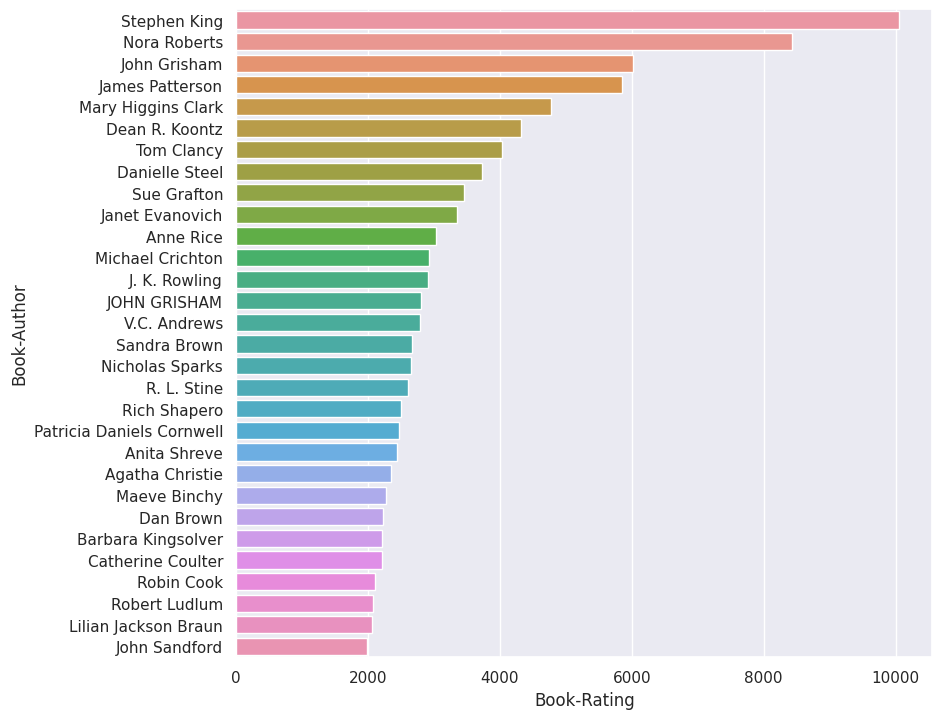

In [461]:
# For setting  the plot style and increase figure size
sns.set(rc={'figure.figsize':(8,8)})

#Counting rating for each authors
top_book_authors = merged_dataset.groupby(['Book-Author'])['Book-Rating'].count().reset_index().sort_values(['Book-Rating'], ascending=False).head(30)

#creating bar plot of above result
sns.barplot(x='Book-Rating', y='Book-Author', data=top_book_authors)
plt.show()

1. What is/are the insight(s) found from the chart?

* Stephen King', 'Nora Roberts', 'John Grisham' are the top three rated authors.

#3) Distribution of no. of books by publishing house.

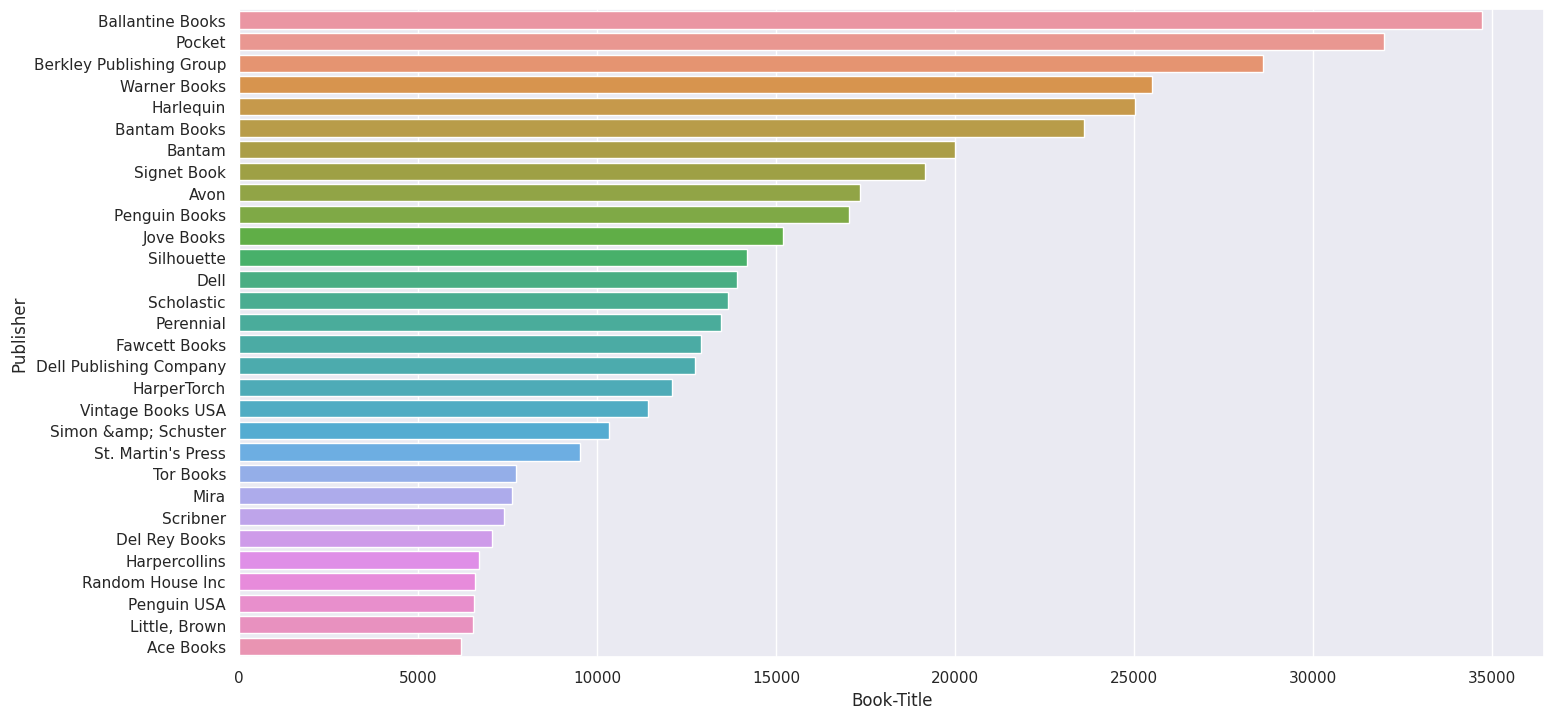

In [462]:
# For setting  the plot style and increase figure size
sns.set(rc={'figure.figsize':(15,8)})


#Counting no. of books for published by each publisher
top_publisher = merged_dataset.groupby(['Publisher'])['Book-Title'].count().reset_index().sort_values(['Book-Title'], ascending=False).head(30)

#plotting bar plot of above result
sns.barplot(y='Publisher', x='Book-Title', data=top_publisher)
plt.show()

1. What is/are the insight(s) found from the chart?## 

*  Ballantine Books is the publisher with the highest number of published books, followed by Pocket and Berkley publisher group. 

# 4) Distribution of Ratings given by users.

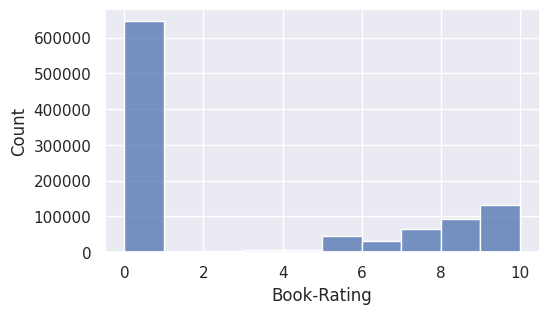

In [463]:
# Setting the plot style and increase figure size
sns.set(rc={'figure.figsize':(5,3)})

# Creating the histogram plot of book ratings with 10 bins
sns.histplot(data=merged_dataset, x='Book-Rating', bins=10)

# Show the plot
plt.show()

1. What is/are the insight(s) found from the chart?

* Most numbers of books are published by Ballantine Books then by Pocket then by Berkley publisher group.

# 5) Distribution of books as per year of publication.

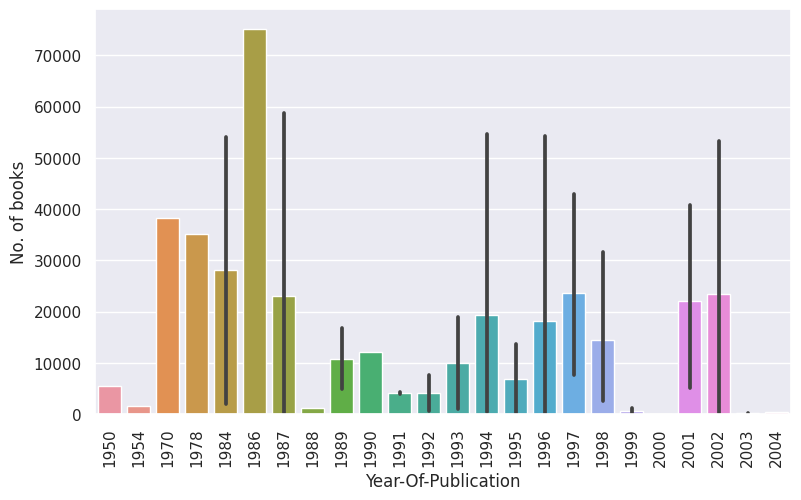

In [464]:
# Counting the number of books published per year and sorting by year
year_counts = merged_dataset[['Year-Of-Publication']].value_counts().reset_index()

#renaming column
year_counts = year_counts.rename(columns={0: 'No. of books'})

# Setting the plot style 
sns.set(rc={'figure.figsize':(8,5)})

# Creating the bar plot of the above obtained values
ax = sns.barplot(x=merged_dataset['Year-Of-Publication'][:70], y=year_counts['No. of books'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

#####  What is/are the insight(s) found from the chart?

* Maximum number of books are published in year 1986.

# <b>Insights about Users.

# 6)Plotting User-id vs Number of rating given by the user.

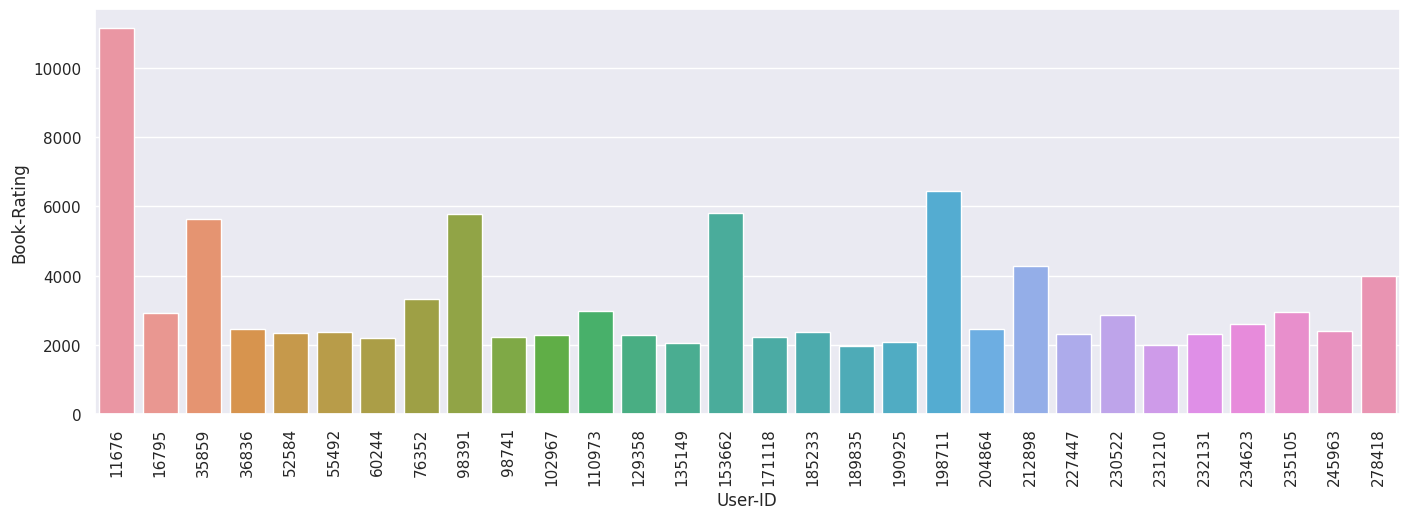

In [465]:
# Set the plot style and increase figure size
sns.set(rc={'figure.figsize':(15,5)})

#counting number of rating given by users
top_users = merged_dataset.groupby(['User-ID'])['Book-Rating'].count().reset_index().sort_values(['Book-Rating'], ascending=False).head(30)

#plotting the above results
ax = sns.barplot(x='User-ID', y='Book-Rating', data=top_users)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()


#####  What is/are the insight(s) found from the chart?

* There are few user-ids from where lots of ratings for book have came which might be possible if only it is used by many people (Eg. Library )

#7) Age distribution of users.

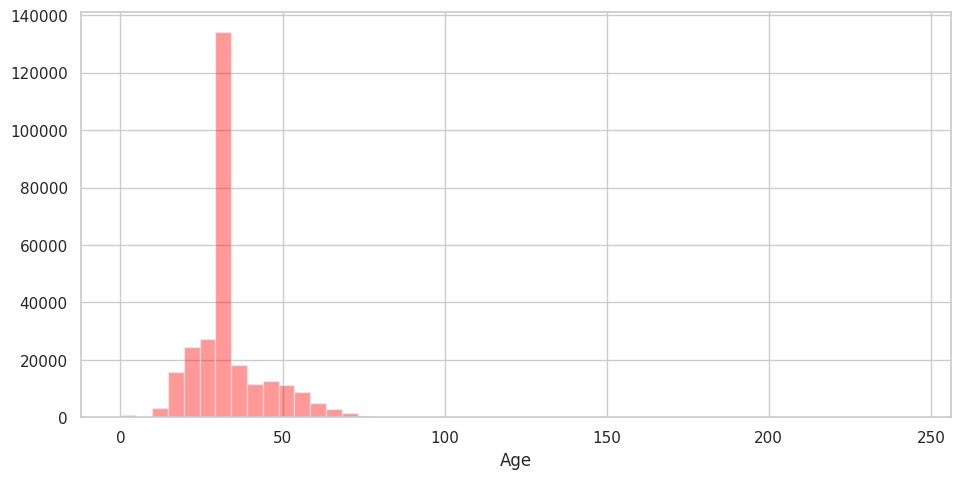

In [466]:
# Set the plot style and increase figure size
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style('whitegrid')

#plotting distribution plot
sns.distplot(users_df['Age'], kde = False, color ='red', bins = 50)
plt.show()

#####  What is/are the insight(s) found from the chart?

* Most of the users in the age group of 25-45 years of age after which number of users goes on decreasing with increase in age. 

## 8)Age group vs Book-Rating given by users in that age group.

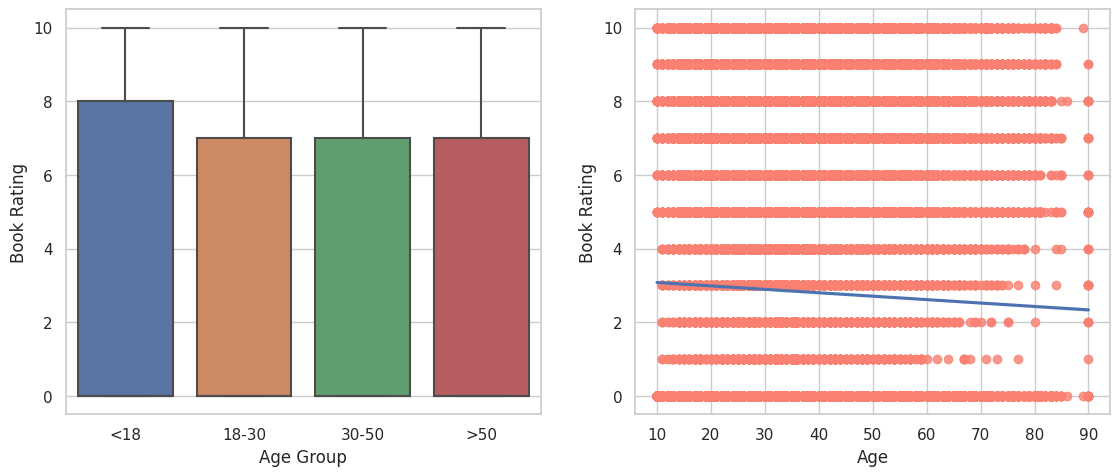

In [467]:
# Create a single figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

#For Cceating the first subplot (box plot)

#creating new age group column
merged_dataset['Age Group'] = pd.cut(merged_dataset['Age'], bins=[0, 18, 30, 50, 100], labels=['<18', '18-30', '30-50', '>50'])
sns.boxplot(x='Age Group', y='Book-Rating', data=merged_dataset, ax=ax1)
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Book Rating')

# Creating the second subplot (scatter plot)
sns.regplot(x='Age', y='Book-Rating',scatter_kws={"color": "salmon"},data=merged_dataset, ax=ax2)
ax2.set_xlabel('Age')
ax2.set_ylabel('Book Rating')

# Display the plot
plt.show()


##### 1. What is/are the insight(s) found from the chart?

* Young generation give rating more generously than older users.

# 9) Distribution of ratings given by users as per location.

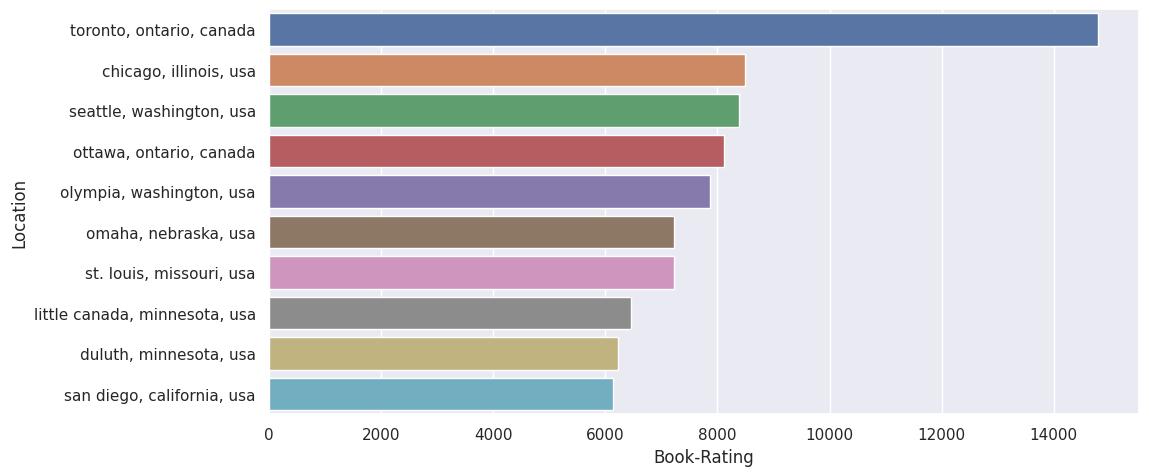

In [468]:
# Set the plot style and increase figure size
sns.set(rc={'figure.figsize':(10,5)})

#Calculating number of rating given by users based on their location
top_user_locations = merged_dataset.groupby(['Location'])['Book-Rating'].count().reset_index().sort_values(['Book-Rating'], ascending=False).reset_index().drop(columns=['index']).rename(columns={'age': 'years'}).head(11)

#dropping N/A values
top_user_locations=top_user_locations.drop(index=1)

#plotting barplot of the above result
sns.barplot(x='Book-Rating', y='Location', data=top_user_locations)
plt.show()

##### 2. What is/are the insight(s) found from the chart?

* Most numbers of ratings are given by users from Toronto,Ontario,Canada followed by Chicago,Illinois,USA.

# Chart - 10 - Correlation Heatmap

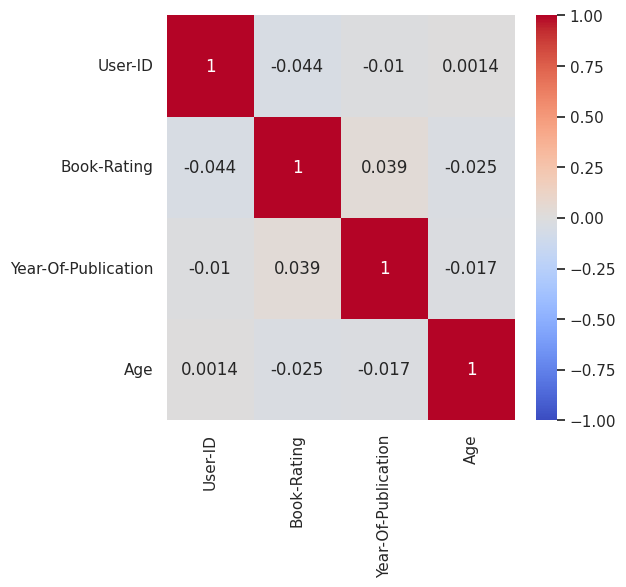

In [469]:

# Correlation Heatmap visualization code
corr_df = merged_dataset                  
corr_df = corr_df.corr()
plt.figure(figsize=(5,5))
sns.heatmap(corr_df, vmin=-1, cmap='coolwarm', annot=True)
plt.show()

##### 1. Why did you pick the specific chart?

Heatmaps are used to show relationships between two variables, one plotted on each axis. By observing how cell colors change across each axis, you can observe if there are any patterns in value for one or both variables.Since we want find relationship between diffrent variables in dataframe and heatmap can be one of the way to visualize it.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

# Chart - 11 - Pair Plot 

In [470]:
'''# Pair Plot visualization code
numeric_col = ['User-ID','Book-Rating','Age']
sns.pairplot(merged_dataset, hue='Book-Rating',y_vars ='Book-Rating')
plt.show()'''

"# Pair Plot visualization code\nnumeric_col = ['User-ID','Book-Rating','Age']\nsns.pairplot(merged_dataset, hue='Book-Rating',y_vars ='Book-Rating')\nplt.show()"

##### 1. Why did you pick the specific chart?

A pairs plot allows us to see both distribution of single variables and relationships between two variables. Pair plots are a great method to identify trends for follow-up analysis and can be easily implemented in Python.

#<b> Conclusions from EDA:-

* The book dataset analysis revealed that Wild Animus, The Lovely Bones: A Novel, and The Da Vinci Code are the top three rated books.
*  Stephen King, Nora Roberts, and John Grisham are the top-rated authors.
*  It was observed that the maximum number of books from the collection are unrated.

* Among rated books, most books are given a rating above 8.
*  Ballantine Books is the publisher with the highest number of published books, followed by Pocket and Berkley publisher group. 
* The maximum number of books are published in the year 1986.

* A few user-ids have provided a large number of ratings for books, which suggests that these ids might be available in libraries or other public places where many people use them.

* Most of the users in the age group of 25-45 years of age after which the number of users decreases with an increase in age. 
* Younger generations tend to give ratings more generously than older users.

* Finally,  most numbers of ratings are given by users from Toronto,Ontario,Canada followed by Chicago,Illinois,USA.
* Overall, this analysis provides insights into the book dataset, which can help with better recommendations and decision-making. 

## ***5. Hypothesis Testing***

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

<b>H0(null hypothesis): There is no significant difference in the book-rating with respect to Age of user .

<b>H1(alternate hypothesis):There is significant difference in the book-rating with respect to Age of user .

#### 2. Perform an appropriate statistical test.

In [471]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind

# Getting two samples based on a condition
sample1 = merged_dataset[merged_dataset['Age'] <= 35]['Book-Rating']
sample2 = merged_dataset[merged_dataset['Age'] > 50]['Book-Rating']

# Performing a two-sample t-test
t_statistic, p_value = ttest_ind(sample1, sample2, equal_var=False)

# Printing the results
print('T-statistic:', t_statistic)
print('P-value:', p_value)
if p_value < 0.05:
  print('We are rejecting null hypothesis.\ni.e There is significant difference in the book-rating with respect to Age of user .')
else:
  print('We are accepting null hypothesis.\ni.e There is no significant difference in the book-rating with respect to Age of user .')   



T-statistic: 11.669980538294698
P-value: 1.8681144883281745e-31
We are rejecting null hypothesis.
i.e There is significant difference in the book-rating with respect to Age of user .


##### Which statistical test have you done to obtain P-Value?

Two sample T-test

##### Why did you choose the specific statistical test?

A two-sample t-test is a statistical test used to compare the means of two different samples to determine if there is a significant difference between them.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

<b>H0(null hypothesis): There is no significant difference in mean Book-
Rating between users from Canada and the United States.

H1(alternate hypothesis): There is  significant difference in mean Book-
Rating  between users from Canada and the United States.

#### 2. Perform an appropriate statistical test.

In [472]:
import scipy.stats as stats

# Creating two separate dataframes for users from Canada and the United States
canada_df = merged_dataset[merged_dataset['Location'].str.contains('canada', case=False)]
us_df = merged_dataset[merged_dataset['Location'].str.contains('usa', case=False)]

# Getting the mean ratings for each group
canada_mean = canada_df['Book-Rating'].mean()
us_mean = us_df['Book-Rating'].mean()

# Performing a two-sample t-test assuming unequal variances
t_stat, p_val = stats.ttest_ind(canada_df['Book-Rating'], us_df['Book-Rating'], equal_var=False)

# Printing the results
print('t-statistic:', t_stat)
print('p-value:', p_val)

if p_value < 0.05:
  print('We are rejecting null hypothesis.\ni.e There is significant difference in the mean book-rating between users from Canada and the United States..')
else:
  print('We are accepting null hypothesis.\ni.e There is no significant difference in the mean book-rating between users from Canada and the United States..')

t-statistic: -0.8805101157427964
p-value: 0.3785846741433566
We are rejecting null hypothesis.
i.e There is significant difference in the mean book-rating between users from Canada and the United States..


##### Which statistical test have you done to obtain P-Value?

Two sample T-test.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

<b>H0(null hypothesis): There is no significant difference in Book-
Rating with respect to year of publication.

H1(alternate hypothesis): There is  significant difference in Book-
Rating with respect to year of publication.

#### 2. Perform an appropriate statistical test.

In [473]:
# Dividing the dataset into two groups based on year of publication
before_2000 = merged_dataset[merged_dataset['Year-Of-Publication'] < 2000]['Book-Rating']
after_2000 = merged_dataset[merged_dataset['Year-Of-Publication'] >= 2000]['Book-Rating']

# Calculating the mean rating for each group
mean_before = before_2000.mean()
mean_after = after_2000.mean()

# Perform a t-test to determine whether the difference in means is statistically significant
t_stat, p_val = stats.ttest_ind(before_2000, after_2000, equal_var=False)

print('T-statistic:', t_stat)
print('P-value:', p_val)
if p_value < 0.05:
  print('We are rejecting null hypothesis.\ni.e There is significant difference in the book-rating with respect to year of publication.')
else:
  print('We are accepting null hypothesis.\ni.e There is no significant difference in the book-rating with respect to year of publication.')   




T-statistic: -46.880344275657144
P-value: 0.0
We are rejecting null hypothesis.
i.e There is significant difference in the book-rating with respect to year of publication.


##### Which statistical test have you done to obtain P-Value?

Two sample T-test.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [474]:
# Handling Missing Values & Missing Value Imputation

#ALREADY DONE

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [475]:
# Handling Outliers & Outlier treatments

#ALREADY DONE

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [476]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

#<b> Creating Book Recommender System.

#<b>1) Popularity Based Recommendation System

In [477]:
#counting number of ratings each books have got.
count_ratings=merged_dataset.groupby('Book-Title')['Book-Rating'].count().reset_index()

#renaming column
count_ratings.rename(columns={'Book-Rating':'count_ratings'},inplace=True)
count_ratings.head(3)

Book-Title  count_ratings
0   A Light in the Storm: The Civil War Diary of ...              4
1                              Always Have Popsicles              1
2               Apple Magic (The Collector's series)              1

In [478]:
#finding mean rating for each books.
mean_rating = merged_dataset.loc[merged_dataset['Book-Rating'] > 0].groupby('Book-Title')['Book-Rating'].mean().reset_index()

#mean_rating=merged_dataset.groupby('Book-Title')['Book-Rating'].mean().reset_index()

#renaming column
mean_rating.rename(columns={'Book-Rating':'mean_ratings'},inplace=True)
mean_rating.head(3)

Book-Title  mean_ratings
0   A Light in the Storm: The Civil War Diary of ...           9.0
1   Ask Lily (Young Women of Faith: Lily Series, ...           8.0
2                                       Dark Justice          10.0

In [479]:
#merging count_rating,mean_rating column 
book_mean_rating=pd.merge(count_ratings,mean_rating, on='Book-Title', how='inner')

#filtering books which have got atleast 150 ratings.
popular_books=book_mean_rating[book_mean_rating['count_ratings']>=150].sort_values('mean_ratings',ascending=False)
popular_books.head(50)

Book-Title  count_ratings  \
119061     The Two Towers (The Lord of the Rings, Part 2)            260   
115128  The Return of the King (The Lord of the Rings,...            211   
45381        Harry Potter and the Goblet of Fire (Book 4)            387   
45400      Harry Potter and the Sorcerer's Stone (Book 1)            278   
45385   Harry Potter and the Order of the Phoenix (Boo...            347   
45393   Harry Potter and the Prisoner of Azkaban (Book 3)            428   
123681                              To Kill a Mockingbird            510   
45403   Harry Potter and the Sorcerer's Stone (Harry P...            575   
34428       Ender's Game (Ender Wiggins Saga (Paperback))            249   
116152                                  The Secret Garden            155   
104949  The Fellowship of the Ring (The Lord of the Ri...            368   
8442    Anne of Green Gables (Anne of Green Gables Nov...            160   
4470                                    A Wrinkle In Time            158   
45374    Harry Potter and the Chamber of Secrets (Book 2)            556   
114271  The Princess Bride: S Morgenstern's Classic Ta...            169   
441                                                  1984            284   
107397  The Hobbit : The Enchanting Prelude to The Lor...            281   
117778      The Subtle Knife (His Dark Materials, Book 2)            225   
47544                            Holes (Yearling Newbery)            154   
111376                                The Mists of Avalon            194   
106039                 The Giver (21st Century Reference)            179   
3283                              A Prayer for Owen Meany            413   
4471                                    A Wrinkle in Time            192   
129610                                     Watership Down            312   
125564  Tuesdays with Morrie: An Old Man, a Young Man,...            493   
101587                                   The Color Purple            314   
36288                                      Fahrenheit 451            409   
80329                                 Pride and Prejudice            182   
89469                                          Siddhartha            172   
40128       Fried Green Tomatoes at the Whistle Stop Cafe            313   
107378               The Hitchhiker's Guide to the Galaxy            268   
106651                                     The Green Mile            264   
72599                                               Night            202   
76293                                           Outlander            283   
116196                            The Secret Life of Bees            774   
87250                      Seabiscuit: An American Legend            275   
52973        Ishmael: An Adventure of the Mind and Spirit            162   
106893                                The Handmaid's Tale            311   
96552   Tears of the Giraffe (No.1 Ladies Detective Ag...            202   
31104                                  Dragonfly in Amber            151   
102703                                  The Da Vinci Code            898   
113719                           The Pillars of the Earth            231   
36894   Fast Food Nation: The Dark Side of the All-Ame...            321   
112938                              The Other Boleyn Girl            159   
103752  The Drawing of the Three (The Dark Tower, Book 2)            179   
125066  Tribulation Force: The Continuing Drama of Tho...            182   
106189    The Golden Compass (His Dark Materials, Book 1)            336   
46982                  High Five (A Stephanie Plum Novel)            228   
104640                           The Eyre Affair: A Novel            171   
89601                                Silence of the Lambs            256   

        mean_ratings  
119061      9.330882  
115128      9.213592  
45381       9.125506  
45400       9.062500  
45385       9.047393  
45393       9.043321  
123681   

In [480]:
#Merging this popular_book dataframe with book_df
popular_books = popular_books.merge(merged_dataset,on='Book-Title').drop_duplicates('Book-Title')

#selecting required feature which will help us to display books on streamlit
popular_books=popular_books[['User-ID','ISBN','Book-Title','Book-Author','Year-Of-Publication','Image-URL-M','count_ratings','mean_ratings','Publisher']]
popular_books.head(3)

User-ID        ISBN                                         Book-Title  \
0      81977  0618002235     The Two Towers (The Lord of the Rings, Part 2)   
260   138543  0345339738  The Return of the King (The Lord of the Rings,...   
471   145451  0439139597       Harry Potter and the Goblet of Fire (Book 4)   

          Book-Author  Year-Of-Publication  \
0    J. R. R. Tolkien                 1999   
260    J.R.R. TOLKIEN                 1986   
471     J. K. Rowling                 2000   

                                           Image-URL-M  count_ratings  \
0    http://images.amazon.com/images/P/0618002235.0...            260   
260  http://images.amazon.com/images/P/0345339738.0...            211   
471  http://images.amazon.com/images/P/0439139597.0...            387   

     mean_ratings                 Publisher  
0        9.330882  Houghton Mifflin Company  
260      9.213592                   Del Rey  
471      9.125506                Scholastic

#<b>2) Recommendation based on similar authors.





In [481]:
#function to filter books based on silimar author
def author_based_filtering(author,book_name):
  df=merged_dataset[merged_dataset['Book-Author']==author].drop_duplicates('Year-Of-Publication')[['Book-Title','Book-Author','Image-URL-M']]
  df=df[~(df['Book-Title'].str.contains(book_name))]
  return df.reset_index().drop('index', axis=1)

In [482]:
#calling function to check for filtered value
author_based_filtering('Anne Rice','Cry to Heaven')

Book-Title Book-Author  \
0   The Queen of the Damned (Vampire Chronicles (P...   Anne Rice   
1     Vittorio the Vampire: New Tales of the Vampires   Anne Rice   
2                Merrick (Vampire/Witches Chronicles)   Anne Rice   
3             Blackwood Farm (The Vampire Chronicles)   Anne Rice   
4   The Sleeping Beauty Novels: The Claiming of Sl...   Anne Rice   
5                      The Mummy or Ramses the Damned   Anne Rice   
6                                 Feast of All Saints   Anne Rice   
7   The Vampire Armand (The Vampire Chronicles, Bo...   Anne Rice   
8        Memnoch the Devil (Vampire Chronicles, No 5)   Anne Rice   
9                        Interview With the Vampire 1   Anne Rice   
10               Taltos: Lives of the Mayfair Witches   Anne Rice   
11                               Servant of the Bones   Anne Rice   
12               Taltos: Lives of the Mayfair Witches   Anne Rice   
13  Queen of the Damned (Vampire Chronicles, Book ...   Anne Rice   
14                     The Mummy or Ramses the Damned   Anne Rice   
15                         Interview With the Vampire   Anne Rice   
16                         Interview with the Vampire   Anne Rice   
17                                 Armand der Vampir.   Anne Rice   
18                         FEAST OF ALL STS : A NOVEL   Anne Rice   
19             Lestat le Vampire / Lestat the Vampire   Anne Rice   

                                          Image-URL-M  
0   http://images.amazon.com/images/P/0345351525.0...  
1   http://images.amazon.com/images/P/0375401601.0...  
2   http://images.amazon.com/images/P/0345422406.0...  
3   http://images.amazon.com/images/P/0375411992.0...  
4   http://images.amazon.com/images/P/0452152984.0...  
5   http://images.amazon.com/images/P/0345369947.0...  
6   http://images.amazon.com/images/P/0345334531.0...  
7   http://images.amazon.com/images/P/0345434803.0...  
8   http://images.amazon.com/images/P/0345409671.0...  
9   http://images.amazon.com/images/P/0345331974.0...  
10  http://images.amazon.com/images/P/067942573X.0...  
11  http://images.amazon.com/images/P/0345389417.0...  
12  http://images.amazon.com/images/P/0345404319.0...  
13  http://images.amazon.com/images/P/0394558235.0...  
14  http://images.amazon.com/images/P/0345360001.0...  
15  http://images.amazon.com/images/P/0345256085.0...  
16  http://images.amazon.com/images/P/0345310594.0...  
17  http://images.amazon.com/images/P/3596156262.0...  
18  http://images.amazon.com/images/P/0671247557.0...  
19  http://images.amazon.com/images/P/226612157X.0...

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [483]:
# Expand Contraction

#### 2. Lower Casing

In [484]:
# Lower Casing

#### 3. Removing Punctuations

In [485]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [486]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [487]:
# Remove Stopwords

In [488]:
# Remove White spaces

#### 6. Rephrase Text

In [489]:
# Rephrase Text

#### 7. Tokenization

In [490]:
# Tokenization

#### 8. Text Normalization

In [491]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [492]:
# POS Taging

#### 10. Text Vectorization

In [493]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [494]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [495]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [496]:
# Transform Your data

### 6. Data Scaling

In [497]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [498]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [499]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [500]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

#**Collaborative Filtering (CF):-**

* Collaborative filtering is the process of filtering for information or patterns using techniques involving collaboration among multiple agents, viewpoints, data sources.Basically, it is a method of making automatic predictions (filtering) about the interests of a user by collecting preferences or taste information from many users.

There are 2 approaches to CF -->

**Memory-Based CF** - It is an approach which finds similarity between users or between items to recommend similar items. Examples include Neighbourhood-based CF and Item-based/User-based top-N recommendations.

**Model-Based CF** - In this approach we use different data mining, machine learning algorithms to predict users' rating of unrated items. Examples include Singular Value Decomposition (SVD) , Principal Component Analysis (PCA) etc.

**Memory Based Collaborative Filtering :-**

There are 2 approaches to Memory-Based CF -->

* **1) User-User Collaborative Filtering** - In this we we calculate similarity of all the users to the active user ( the user whom the prediction is for ).Then sort and filter the Top-N users to make predictions for the active user. This is usually very effective but takes a lot of time and resources. For example if Dennis and Davis like the same movies and a new movie comes out that Davis likes,then we can recommend that movie to Dennis because Davis and Dennis seem to like the same movies.

* **2)Item-Item Collaborative Filtering** - This is similar to User-User CF, just that we now compute similarity between items to recommend similar items. Eg. When you buy any product on Amazon, you will find this line "Users who bought this item also bought...", so Amazon uses item-item CF widely, Mind that I'm not saying they use only item-item CF, they have hybrid techniques to better suit users of even unique interests.

Item-Item CF are a lot faster than User-User CF. and secondly user profiles changes quickly and the entire system model has to be recomputed, whereas item's average ratings doesn't change that quickly, and this leads to more stable rating distributions in the model, so the model doesn't have to be rebuilt as often.

**Ways to calculate similarity :-**

 There are many measures to calculate the similarity matrix, some of them are

* **Jaccard Similarity** - It is a statistic used for comparing the similarity and diversity of sample sets. It is defined as the size of the intersection divided by the size of the union of the sample sets.

* **Cosine Similarity*** - It measures the angle between the ratings vector. If the angle is 0°, then they are vectors having same orientation and if the angle is 180°, then they are highly dissimilar vectors.

* **Pearson Similarity** - It is actually Centered-Cosine similarity. We subtract the mean ratings from the user ratings, so that the mean is centered at 0, and then calculate the cosine similarity.

#<b>Item-Item Collaborative Filtering 

In [501]:
#Filtering users who have given atleast 200 ratings
xp_readers = merged_dataset.groupby('User-ID').count()['Book-Rating'] > 200

#Index of all the users who have given atleast 200 ratings to books
xp_readers_index = xp_readers[xp_readers].index

#Filtering all these users in dataframe
filtered_xp_users = merged_dataset[merged_dataset['User-ID'].isin(xp_readers_index)]

In [502]:
#Filtering all the books which have got atleast 50 ratings
rated_books = filtered_xp_users.groupby('Book-Title').count()['Book-Rating']>=50

#Index of all the books who have got atleast 50 ratings 
popular_books_index= rated_books[rated_books].index

#Filtering all books in dataframe
final_filtered_df = filtered_xp_users[filtered_xp_users['Book-Title'].isin(popular_books_index)]

In [503]:
#Creating  Pivot Table
book_pivot = final_filtered_df.pivot_table(columns='User-ID', index='Book-Title', values="Book-Rating")
book_pivot.fillna(0, inplace=True)
book_pivot

User-ID                                             254     2276    2766    \
Book-Title                                                                   
1984                                                   9.0     0.0     0.0   
1st to Die: A Novel                                    0.0     0.0     0.0   
2nd Chance                                             0.0    10.0     0.0   
4 Blondes                                              0.0     0.0     0.0   
A Bend in the Road                                     0.0     0.0     7.0   
...                                                    ...     ...     ...   
Year of Wonders                                        0.0     0.0     0.0   
You Belong To Me                                       0.0     0.0     0.0   
Zen and the Art of Motorcycle Maintenance: An I...     0.0     0.0     0.0   
Zoya                                                   0.0     0.0     0.0   
\O\" Is for Outlaw"                                    0.0     0.0     0.0   

User-ID                                             2977    3363    4017    \
Book-Title                                                                   
1984                                                   0.0     0.0     0.0   
1st to Die: A Novel                                    0.0     0.0     0.0   
2nd Chance                                             0.0     0.0     0.0   
4 Blondes                                              0.0     0.0     0.0   
A Bend in the Road                                     0.0     0.0     0.0   
...                                                    ...     ...     ...   
Year of Wonders                                        7.0     0.0     0.0   
You Belong To Me                                       0.0     0.0     0.0   
Zen and the Art of Motorcycle Maintenance: An I...     0.0     0.0     0.0   
Zoya                                                   0.0     0.0     0.0   
\O\" Is for Outlaw"                                    0.0     0.0     0.0   

User-ID                                             4385    6251    6323    \
Book-Title                                                                   
1984                                                   0.0     0.0     0.0   
1st to Die: A Novel                                    0.0     0.0     0.0   
2nd Chance                                             0.0     0.0     0.0   
4 Blondes                                              0.0     0.0     0.0   
A Bend in the Road                                     0.0     0.0     0.0   
...                                                    ...     ...     ...   
Year of Wonders                                        0.0     0.0     0.0   
You Belong To Me                                       0.0     0.0     0.0   
Zen and the Art of Motorcycle Maintenance: An I...     0.0     0.0     0.0   
Zoya                                                   0.0     0.0     0.0   
\O\" Is for Outlaw"                                    0.0     0.0     0.0   

User-ID                                             6543    ...  271705  \
Book-Title                                                  ...           
1984                                                   0.0  ...    10.0   
1st to Die: A Novel                                    9.0  ...     0.0   
2nd Chance                                             0.0  ...     0.0   
4 Blondes                                              0.0  ...     0.0   
A Bend in the Road                                     0.0  ...     0.0   
...                                                    ...  ...     ...   
Year of Wonders                                        0.0  ...     0.0   
You Belong To Me                                       0.0  ...     0.0   
Zen and the Art of Motorcycle Maintenance: An I...     0.0  ...     0.0   
Zoya                                                   0.0  ...     0.0   
\O\" Is for Outlaw"                                    

In [504]:
# Implementing nearest neighbors algorithm which uses clustering based on euclidian distance.
def Item_based_recomm(book_pivot=book_pivot,book_name=''):
  try:
    book_sparse = csr_matrix(book_pivot)

    #Implementing nearest neighbour algorithm
    model = NearestNeighbors(algorithm='auto')
    model.fit(book_sparse)
  
    #finding index of book
    for i in range(len(book_pivot.index)):
      if(book_pivot.index[i]==book_name):
        book_index=i

    #prediction using knn
    distances, suggestions = model.kneighbors(book_pivot.iloc[book_index, :].values.reshape(1, -1))    
  
    #Top 5 prediction
    new_df = pd.DataFrame()
    for i in range(5):
      df = pd.DataFrame()
      df=merged_dataset[merged_dataset['Book-Title']==book_pivot.index[suggestions[0][i]]].drop_duplicates('Book-Title')[['Book-Title','Book-Author','Year-Of-Publication','Publisher','Image-URL-M']]
      new_df=new_df.append(df, ignore_index=True)
    return new_df  
  except:
    print("Enter correct or complete book name")
    return None



In [505]:
#prediction to check recommendation for Harry Potter and the Goblet of Fire (Book 4)	
Item_based_recomm(book_pivot,'Harry Potter and the Goblet of Fire (Book 4)')

Book-Title    Book-Author  \
0       Harry Potter and the Goblet of Fire (Book 4)  J. K. Rowling   
1  Harry Potter and the Prisoner of Azkaban (Book 3)  J. K. Rowling   
2  Harry Potter and the Order of the Phoenix (Boo...  J. K. Rowling   
3   Harry Potter and the Chamber of Secrets (Book 2)  J. K. Rowling   
4                                          Exclusive   Sandra Brown   

   Year-Of-Publication     Publisher  \
0                 2000    Scholastic   
1                 1999    Scholastic   
2                 2003    Scholastic   
3                 1999    Scholastic   
4                 1997  Warner Books   

                                         Image-URL-M  
0  http://images.amazon.com/images/P/0439139597.0...  
1  http://images.amazon.com/images/P/0439136350.0...  
2  http://images.amazon.com/images/P/043935806X.0...  
3  http://images.amazon.com/images/P/0439064864.0...  
4  http://images.amazon.com/images/P/0446604232.0...

In [506]:
#prediction to check recommendation for The Drawing of the Three (The Dark Tower, Book 2)	
Item_based_recomm(book_pivot,'The Drawing of the Three (The Dark Tower, Book 2)')

Book-Title              Book-Author  \
0  The Drawing of the Three (The Dark Tower, Book 2)             Stephen King   
1          Wizard and Glass (The Dark Tower, Book 4)             Stephen King   
2            The Gunslinger (The Dark Tower, Book 1)             Stephen King   
3                                      No Safe Place  RICHARD NORTH PATTERSON   
4                                     A Civil Action            JONATHAN HARR   

   Year-Of-Publication         Publisher  \
0                 1997       Signet Book   
1                 2003      Viking Books   
2                 2003      Viking Books   
3                 1999  Ballantine Books   
4                 1996           Vintage   

                                         Image-URL-M  
0  http://images.amazon.com/images/P/0451163524.0...  
1  http://images.amazon.com/images/P/0670032573.0...  
2  http://images.amazon.com/images/P/0670032549.0...  
3  http://images.amazon.com/images/P/0345404777.0...  
4  http://images.amazon.com/images/P/0679772677.0...

In [507]:
#Entering incorrect book name
Item_based_recomm(book_pivot,'Harry Potter and the Chamber of Secrets')

Enter correct or complete book name


#<b>User-User collaborative filtering method

In [508]:
# Function to find the top N favorite book of a user 
def favoritebook(activeUser,N):
    #1. subset the dataframe to have the rows corresponding to the active user
    # 2. sort by the rating in descending order
    # 3. pick the top N rows
    topbooks=pd.DataFrame.sort_values(merged_dataset[merged_dataset['User-ID']==activeUser],['Book-Rating'],ascending=[0])[:N]
    # return the title corresponding to the books in topbooks 
    if(topbooks.empty):
      return "Insufficient data"
    else:  
      return list(topbooks['Book-Title'])

print(favoritebook(8,3)) # Print the top 3 favorite books of user 8


['Goodbye to the Buttermilk Sky', 'More Cunning Than Man: A Social History of Rats and Man', 'The Witchfinder (Amos Walker Mystery Series)']


In [509]:
#Filtering users who have given atleast 200 ratings
xp_readers = merged_dataset.groupby('User-ID').count()['Book-Rating'] > 200

#Index of all the users who have given atleast 200 ratings to books
xp_readers_index = xp_readers[xp_readers].index

#Filtering all these users in dataframe
filtered_xp_users = merged_dataset[merged_dataset['User-ID'].isin(xp_readers_index)]

In [510]:
#Filtering all the books which have got atleast 50 ratings
rated_books = filtered_xp_users.groupby('Book-Title').count()['Book-Rating']>=50

#Index of all the books who have got atleast 50 ratings 
popular_books_index= rated_books[rated_books].index

#Filtering all books in dataframe
final_filtered_df = filtered_xp_users[filtered_xp_users['Book-Title'].isin(popular_books_index)]

In [511]:
#finding  the K Nearest neighbours of a user and using their ratings to predict ratings of the active user for books they haven't rated.

#Creating Pivot table
userItemRatingMatrix=pd.pivot_table(final_filtered_df, values='Book-Rating',index=['User-ID'],
                                    columns=['Book-Title'])

userItemRatingMatrix.head()

Book-Title  1984  1st to Die: A Novel  2nd Chance  4 Blondes  \
User-ID                                                        
254          9.0                  NaN         NaN        NaN   
2276         NaN                  NaN        10.0        NaN   
2766         NaN                  NaN         NaN        NaN   
2977         NaN                  NaN         NaN        NaN   
3363         NaN                  NaN         NaN        NaN   

Book-Title  A Bend in the Road  A Case of Need  \
User-ID                                          
254                        0.0             NaN   
2276                       NaN             NaN   
2766                       7.0             0.0   
2977                       NaN             NaN   
3363                       NaN             NaN   

Book-Title  A Child Called \It\": One Child's Courage to Survive"  \
User-ID                                                             
254                                                       NaN       
2276                                                      NaN       
2766                                                      NaN       
2977                                                      NaN       
3363                                                      NaN       

Book-Title  A Civil Action  A Day Late and a Dollar Short  A Fine Balance  \
User-ID                                                                     
254                    NaN                            NaN             NaN   
2276                   NaN                            NaN             NaN   
2766                   NaN                            NaN             NaN   
2977                   NaN                            NaN             NaN   
3363                   0.0                            NaN             NaN   

Book-Title  ...  Winter Solstice  Wish You Well  Without Remorse  \
User-ID     ...                                                    
254         ...              NaN            NaN              NaN   
2276        ...              NaN            NaN              NaN   
2766        ...              NaN            NaN              NaN   
2977        ...              NaN            NaN              NaN   
3363        ...              NaN            NaN              NaN   

Book-Title  Wizard and Glass (The Dark Tower, Book 4)  Wuthering Heights  \
User-ID                                                                    
254                                               NaN                NaN   
2276                                              NaN                NaN   
2766                                              NaN                NaN   
2977                                              NaN                NaN   
3363                                              NaN                NaN   

Book-Title  Year of Wonders  You Belong To Me  \
User-ID                                         
254                     NaN               NaN   
2276                    NaN               NaN   
2766                    NaN               NaN   
2977                    7.0               NaN   
3363                    NaN               NaN   

Book-Title  Zen and the Art of Motorcycle Maintenance: An Inquiry into Values  \
User-ID                                                                         
254                                                       NaN                   
2276                                                      NaN                   
2766                                                      NaN                   
2977                                                      NaN                   
3363                                                      0.0                   

Book-Title  Zoya  \O\" Is for Outlaw"  
User-ID                                
254          NaN                  NaN  
2276         NaN                  NaN  
2766         NaN                  NaN  
2977         NaN                  NaN  
3363         N

#Now each user has been represented using their ratings.

In [512]:
# function to find the similarity between 2 users using correlation

def similarity(user1,user2):
    #normalizing user1 by the mean rating of user 1 for any book for removing biases
    user1=np.array(user1)-np.nanmean(user1)

    #normalizing user1 by the mean rating of user 2 for any book for removing biases
    user2=np.array(user2)-np.nanmean(user2)
    # Now to find the similarity between 2 users
    # We'll first subset each user to be represented only by the ratings for book the 2 users have in common 
    commonItemIds=[i for i in range(len(user1)) if user1[i]>0 and user2[i]>0]
    # Gives us book for which both users have non NaN ratings 
    if len(commonItemIds)==0:
        # If there are no book in common 
        return 0
    else:
        user1=np.array([user1[i] for i in commonItemIds])
        user2=np.array([user2[i] for i in commonItemIds])
        return correlation(user1,user2)

#Formula for predicting the rating of active user.

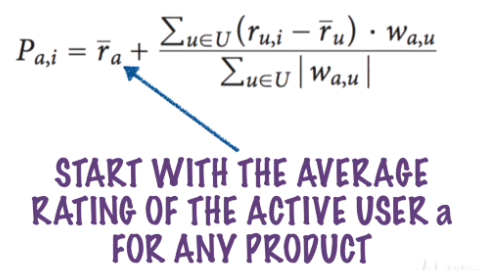

In [513]:
# Using this similarity function we will find the nearest neighbours of the active user

def nearestNeighbourRatings(activeUser,K):
  try:
    '''This function will find the K Nearest neighbours of the active user, then 
      use their ratings to predict the activeUsers ratings for other movies '''
    
    # Creating an empty matrix whose row index is userIds, and the value will be 
    # similarity of that user to the active User for finding similarity with other users.
    similarityMatrix=pd.DataFrame(index=userItemRatingMatrix.index,
                                  columns=['Similarity'])
    
    # Finding the similarity between user i and the active user and add it to the similarityMatrix
    # using similarity function.
    for i in userItemRatingMatrix.index:
        similarityMatrix.loc[i]=similarity(userItemRatingMatrix.loc[activeUser],
                                          userItemRatingMatrix.loc[i])
        
    # Sorting the similarity matrix in the descending order of similarity    
    similarityMatrix=pd.DataFrame.sort_values(similarityMatrix,
                                              ['Similarity'],ascending=False)
    
    # Finding K Nearest neighbours of the active user
    nearestNeighbours=similarityMatrix[:K]
     
    
    # Using the nearest neighbours ratings to predict the active user's rating for every books
    
    neighbourItemRatings=userItemRatingMatrix.loc[nearestNeighbours.index]
    
    # A placeholder for the predicted item ratings. 
    predictItemRating=pd.DataFrame(index=userItemRatingMatrix.columns, columns=['Rating'])

    """We will find predicted rating for active user using the above formula"""

     # for each item 
    for i in userItemRatingMatrix.columns:

        # start with the average rating of the user
        predictedRating=np.nanmean(userItemRatingMatrix.loc[activeUser])

        # for each neighbour in the neighbour list
        for j in neighbourItemRatings.index:

           ''' If the neighbour has rated that item Add the rating of the neighbour for that item
            adjusted by the average rating of the neighbour weighted by the similarity of the neighbour 
            to the active user'''

           if (userItemRatingMatrix.loc[j,i]>0):
                
                predictedRating += (userItemRatingMatrix.loc[j,i]
                                    -np.nanmean(userItemRatingMatrix.loc[j]))*nearestNeighbours.loc[j,'Similarity']
        # adding the rating to the predicted Rating matrix
        predictItemRating.loc[i,'Rating']=predictedRating
    
    return predictItemRating
  except:
      return None

In [514]:
# Using predicted Ratings to find the top N Recommendations for the active user 

def topNRecommendations(activeUser,N):
  try:
    # Using the 10 nearest neighbours to find the predicted ratings
    predictItemRating=nearestNeighbourRatings(activeUser,10)
    
    #removing books which are already read by active user
    booksAlreadyRead=list(userItemRatingMatrix.loc[activeUser]
                              .loc[userItemRatingMatrix.loc[activeUser]>0].index)
    
    # finding the list of items whose ratings which are not NaN
    predictItemRating=predictItemRating.drop(booksAlreadyRead)
    topRecommendations=pd.DataFrame.sort_values(predictItemRating,
                                                ['Rating'],ascending=[0])[:N]
    # This will give us the list of itemIds which are the top recommendations 
    # Let's find the corresponding book titles 

    topRecommendationTitles=(final_filtered_df.loc[final_filtered_df['Book-Title'].isin(topRecommendations.index)])
    list(set(topRecommendationTitles['Book-Title']))
    return final_filtered_df[final_filtered_df['Book-Title'].isin(list(set(topRecommendationTitles['Book-Title'])))].drop_duplicates('Book-Title')[['Book-Title','Book-Author','Year-Of-Publication','Publisher','Image-URL-M']].reset_index().drop(['index'],axis=1)
  except:
    return None

In [515]:
# Finding best recommendation for user-id 3363.
activeUser=3363
print(f'Most favourite books of users \n{{Books:{favoritebook(activeUser,5)}}}')
topNRecommendations(activeUser,5)

Most favourite books of users 
{Books:["Where the Heart Is (Oprah's Book Club (Paperback))", 'Joyful Noise (rpkg) : Poems for Two Voices', 'Afternoon of the Elves', 'A Pocket Full of Seeds (A Puffin Book)', 'The Gym Teacher from the Black Lagoon']}


Book-Title             Book-Author  \
0                                1st to Die: A Novel         James Patterson   
1  Tears of the Giraffe (No.1 Ladies Detective Ag...  Alexander McCall Smith   
2                                          Tara Road            Maeve Binchy   
3                                               1984           George Orwell   
4               Taltos: Lives of the Mayfair Witches               Anne Rice   

   Year-Of-Publication                Publisher  \
0                 2002            Warner Vision   
1                 2002                   Anchor   
2                 2000  Dell Publishing Company   
3                 1990              Signet Book   
4                 1996         Ballantine Books   

                                         Image-URL-M  
0  http://images.amazon.com/images/P/0446610038.0...  
1  http://images.amazon.com/images/P/1400031354.0...  
2  http://images.amazon.com/images/P/0440235596.0...  
3  http://images.amazon.com/images/P/0451524934.0...  
4  http://images.amazon.com/images/P/0345404319.0...

#<b>Using Matrix Factorization :-

* The idea here is to identify some factors (these are factors which influencea user'r rating). The factors are identified by decomposing the user item rating matrix into a user-factor matrix and a item-factor matrix.
*  Each row in the user-factor matrix maps the user onto the hidden factors.
* Each row in the product factor matrix maps the item onto the hidden factors.
* This operation will be pretty expensive because it will effectively give us the factor vectors needed to find the rating of any product by any user 



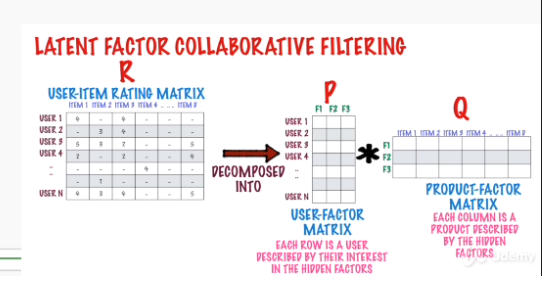

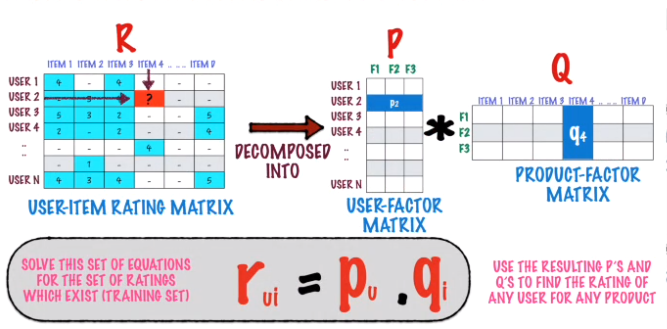

In [516]:
# Function to predict ratings for all the users
def matrixFactorization(R, K, steps=10, gamma=0.001,lamda=0.02):
    # R is the user item rating matrix 
    # K is the number of factors we will find 
    # We'll be using Stochastic Gradient descent to find the factor vectors

    N=len(R.index)# Number of users
    M=len(R.columns) # Number of items 

    # This is the user factor matrix we want to find. It will has N rows on for each user and K columns,
    # one for each factor. We are initializing this matrix with some random numbers, then we will iteratively move towards 
    # the actual value we want to find 
    P=pd.DataFrame(np.random.rand(N,K),index=R.index)
    # This is the product factor matrix we want to find. It will have M rows, 
    # one for each product/item/movie.
    Q=pd.DataFrame(np.random.rand(M,K),index=R.columns)
    # This is the product factor matrix we want to find. It will have M rows, 
    # one for each product/item/movie. 

    # SGD will loop through the ratings in the user item rating matrix 
    # It will do this as many times as we specify (number of steps) or 
    # until the error we are minimizing reaches a certain threshold
    for step in range(steps):
        # SGD will loop through the ratings in the user item rating matrix 
        # It will do this as many times as we specify (number of steps) or 
        # until the error we are minimizing reaches a certain threshold 
        for i in R.index:
            for j in R.columns:
                if R.loc[i,j]>0:
                    # For each rating that exists in the training set 
                    ''' Calulating the error for one rating (ie difference between the actual value of the rating 
                 and the predicted value (dot product of the corresponding user factor vector and item-factor vector)
                 which we have an error function to minimize'''

                    eij=R.loc[i,j]-np.dot(P.loc[i],Q.loc[j])

                    # The Ps and Qs should be moved in the downward direction 
                    # of the slope of the error at the current point 
                    P.loc[i]=P.loc[i]+gamma*(eij*Q.loc[j]-lamda*P.loc[i])

                    # Gamma is the size of the step we are taking / moving the value of P by 
                    # The value in the brackets is the partial derivative of the error function ie the slope. 
                    # Lamda is the value of the regularization parameter which penalizes the model for the 
                    # number of factors we are finding.
                    Q.loc[j]=Q.loc[j]+gamma*(eij*P.loc[i]-lamda*Q.loc[j])


        # checking the value of the error function to see if we have reached 
        # the threshold at which we want to stop, else we will repeat the process
        e=0
        for i in R.index:
            for j in R.columns:
                if R.loc[i,j]>0:
                    #Sum of squares of the errors in the rating
                    e= e + pow(R.loc[i,j]-np.dot(P.loc[i],Q.loc[j]),2)+lamda*(pow(np.linalg.norm(P.loc[i]),2)+pow(np.linalg.norm(Q.loc[j]),2))
        if e<0.001:
            break
        print(step)
    return P,Q

In [517]:
 # top 5 recommendations for a user 
def matrix_fac_recommendation(user):
  try:
    (P,Q)=matrixFactorization(userItemRatingMatrix.iloc[:100,:100],K=2,gamma=0.001,lamda=0.02, steps=50)

    #List of 20 active users
    list(userItemRatingMatrix.index)[:20]
  
    #use these ratings to find top recommendations for a user
    activeUser=user
    predictItemRating=pd.DataFrame(np.dot(P.loc[activeUser],Q.T),index=Q.index,columns=['Book-Rating'])
    topRecommendations=pd.DataFrame.sort_values(predictItemRating,['Book-Rating'],ascending=[0])[:5]
    # We found the ratings of all movies by the active user and then sorted them to find the top 5 movies 
    topRecommendationTitles=final_filtered_df.loc[final_filtered_df['Book-Title'].isin(topRecommendations.index)]
    df=final_filtered_df[final_filtered_df['Book-Title'].isin(list(set(topRecommendationTitles['Book-Title'])))].drop_duplicates('Book-Title')[['Book-Title','Book-Author','Year-Of-Publication','Publisher','Image-URL-M']].reset_index().drop(['index'],axis=1)
    return df
  except:
    return None



In [518]:
#Predicting for user no. 8067
matrix_fac_recommendation(8067)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


Book-Title      Book-Author  \
0  Balzac and the Little Chinese Seamstress : A N...        DAI SIJIE   
1             At Home in Mitford (The Mitford Years)        Jan Karon   
2                               A Widow for One Year      JOHN IRVING   
3                                        Animal Farm    George Orwell   
4  A Man Named Dave: A Story of Triumph and Forgi...  David J. Pelzer   

   Year-Of-Publication     Publisher  \
0                 2002        Anchor   
1                 1996  Viking Books   
2                 2001       Fawcett   
3                 2004        Signet   
4                 1999  Dutton Books   

                                         Image-URL-M  
0  http://images.amazon.com/images/P/0385722206.0...  
1  http://images.amazon.com/images/P/014025448X.0...  
2  http://images.amazon.com/images/P/034543479X.0...  
3  http://images.amazon.com/images/P/0451526341.0...  
4  http://images.amazon.com/images/P/0525945210.0...

# <b>  Using Association rules(Apriory Algorithm):-

In [519]:
# Association rules normally make sense with purchases / transactions datasets
# Here the rule won't have much meaning, except to say a person who reads a book A will also be likely to read book B 

import itertools 
# This module will help us generate all permutations of book title
# We'll use that to find the possible rules and then filter for those with 
# the required confidence



def support(itemset):
    userList=userItemRatingMatrix.index
    nUsers=len(userList)
    ratingMatrix=userItemRatingMatrix
    for book in bookset:
        ratingMatrix=ratingMatrix.loc[ratingMatrix.loc[:,book]>0]
        #Subset the ratingMatrix to the set of users who have rated this item 
        userList=ratingMatrix.index
    # After looping through all the items in the set, we are left only with the
    # users who have rated all the items in the itemset
    return float(len(userList))/float(nUsers)
# Support is the proportion of all users who have watched this set of movies 


In [520]:
allitems=[]
minsupport=0.03
for book in list(userItemRatingMatrix.columns):
    bookset=[book]
    if support(bookset)>minsupport:
        allitems.append(book)
# We are now left only with the items which have been rated by atleast 3% of 
#the users

In [521]:
len(allitems)

174

In [522]:
#  174 of the books were read by atleast 3% of the users. From these books
# we'll generate rules and test again for support and confidence
minconfidence=0.9
assocRules=[]


# This will generate all possible 2 item rules which satisfy the support and  confidence constraints. 
for rule in tqdm(itertools.permutations(allitems,2)):
    #Generates all possible permutations of 2 items from the remaining
    # list of 174 books 
    from_item=[rule[0]]
    to_item=rule
    # each rule is a tuple of 2 items 
    confidence=support(to_item)/support(from_item)
    if (confidence>minconfidence and support(to_item)>minsupport):
        assocRules.append(rule)


30102it [00:48, 617.71it/s]


In [523]:
for i in range(30102):
  if(assocRules[i][0]=='Red Dragon'):
    print(assocRules[i][1])

1984
1st to Die: A Novel
2nd Chance
A Bend in the Road
A Is for Alibi (Kinsey Millhone Mysteries (Paperback))
A Painted House
A Prayer for Owen Meany
A Time to Kill
A Walk to Remember
A Wrinkle in Time
ANGELA'S ASHES
All I Really Need to Know
Angela's Ashes: A Memoir
Angels &amp; Demons
Anne Frank: The Diary of a Young Girl
Anne of Green Gables (Anne of Green Gables Novels (Paperback))
B Is for Burglar (Kinsey Millhone Mysteries (Paperback))
Balzac and the Little Chinese Seamstress : A Novel
Bel Canto: A Novel
Big Stone Gap: A Novel (Ballantine Reader's Circle)
Black House
Bridget Jones's Diary
Confessions of a Shopaholic (Summer Display Opportunity)
Congo
Cradle and All
Cruel &amp; Unusual (Kay Scarpetta Mysteries (Paperback))
Dance upon the Air (Three Sisters Island Trilogy)
Divine Secrets of the Ya-Ya Sisterhood: A Novel
Dolores Claiborne
Dreamcatcher
Empire Falls
Fahrenheit 451
Fast Food Nation: The Dark Side of the All-American Meal
Five Quarters of the Orange
Four Past Midnight
F

In [524]:
len(assocRules)

30102

In [525]:
'''
# This will generate all possible 3 item rules which satisfy the support and  confidence constraints. 
assocRules=[]
for rule in tqdm(itertools.permutations(allitems,3)):
    #Generates all possible permutations of 2 items from the remaining
    # list of 47 movies 
    from_item=[rule[0]]
    to_item=rule
    # each rule is a tuple of 2 items 
    confidence=support(to_item)/support(from_item)
    if (confidence>minconfidence and support(to_item)>minsupport):
        assocRules.append(rule)
'''        

'\n# This will generate all possible 3 item rules which satisfy the support and  confidence constraints. \nassocRules=[]\nfor rule in tqdm(itertools.permutations(allitems,3)):\n    #Generates all possible permutations of 2 items from the remaining\n    # list of 47 movies \n    from_item=[rule[0]]\n    to_item=rule\n    # each rule is a tuple of 2 items \n    confidence=support(to_item)/support(from_item)\n    if (confidence>minconfidence and support(to_item)>minsupport):\n        assocRules.append(rule)\n'

In [526]:
#len(assocRules)

In [527]:
"""
# This will generate all possible 3 item rules which satisfy the support and  confidence constraints. 
assocRules=[]
for rule in tqdm(itertools.permutations(allitems,4)):
    #Generates all possible permutations of 2 items from the remaining
    # list of 47 movies 
    from_item=[rule[0]]
    to_item=rule
    # each rule is a tuple of 2 items 
    confidence=support(to_item)/support(from_item)
    if (confidence>minconfidence and support(to_item)>minsupport):
        assocRules.append(rule)
"""        

'\n# This will generate all possible 3 item rules which satisfy the support and  confidence constraints. \nassocRules=[]\nfor rule in tqdm(itertools.permutations(allitems,4)):\n    #Generates all possible permutations of 2 items from the remaining\n    # list of 47 movies \n    from_item=[rule[0]]\n    to_item=rule\n    # each rule is a tuple of 2 items \n    confidence=support(to_item)/support(from_item)\n    if (confidence>minconfidence and support(to_item)>minsupport):\n        assocRules.append(rule)\n'

In [528]:
#len(assocRules)

## ***7. ML Model Implementation***

**Model Based Collaborative Filtering**

Here we will be using dimensionality reduction methods to improve robustness and accuracy of Memory-Based CF. Basically, we compress user-item matrix into a low dimension matrix. We use techniques like SVD which is a low-rank factorization method, PCA which is used for dimensionaliry reduction etc.

Model-based methods are based on matrix factorization and are better at dealing with sparsity.

We will be using a "Surprise" library to implement SVD, KNN and NMF.
You can find its documentation here > https://surprise.readthedocs.io/en/stable/
Surprise Library has almost all the algorithms implemented that are required for model-based Recommendation systems.

### ML Model - 1

In [529]:
#checking count of rating
final_filtered_df['Book-Rating'].value_counts()

0     43937
8      3597
10     3275
9      2913
7      2185
5      1344
6       906
4       202
3       105
2        62
1        60
Name: Book-Rating, dtype: int64

In [530]:
#selecting only books which have got rating above 4 as if we include below 4 rating then 0 rating will start dominating our model.
model_df=final_filtered_df[final_filtered_df['Book-Rating']>4]

In [531]:
#Splitting data into train and test set.
#df_train, df_test = train_test_split(final_filtered_df, test_size=0.2, random_state=7)

In [532]:
#Reading data using Reader method
reader = Reader(line_format='user item rating', sep=',', rating_scale=(0, 10))

#loading the data as per format provided by surprise library
dfsv = Dataset.load_from_df(model_df[['User-ID','Book-Title','Book-Rating']], reader)

#training data for cross validation
cv_train = Dataset.load_from_df(model_df[['User-ID','Book-Title','Book-Rating']], reader)

#<b>1) K-Nearest Neighbours (KNN)




In [533]:
#creating dataframe for storing results
CVResults = pd.DataFrame(columns = ['Model','RMSE','MAE','Timespan'])

#dictionary containing models from surprise library
classes = {'SVD':SVD,'NMF':NMF,'SlopeOne':SlopeOne,'KNNBasics':KNNBasic,'KNNWIthMeans':KNNWithMeans,
           'KNNBaseline':KNNBaseline,"CoClustering":CoClustering,"BaselineOnly":BaselineOnly,"NormalPredictor":NormalPredictor}

#storing training set data
data = cv_train

#creating instance for performing 3 fold cross validation
kf = KFold(3, random_state=0)



#Performing evaluation for all the models in the dictionary 
for name,model in classes.items():


    start = datetime.datetime.now()
    out = cross_validate(model(), data, ['rmse', 'mae'], kf)
    mean_rmse = '%.3f' % np.mean(out['test_rmse'])
    mean_mae = '%.3f' % np.mean(out['test_mae'])
    cv_time = str(datetime.datetime.now() - start)[:-3]

    #Storing all the result in dataframe
    CVResults = CVResults.append({'Model':name, 'RMSE': mean_rmse, 'MAE': mean_mae, 'Timespan': cv_time}, ignore_index=True)


print('All models have run. Call the CVResults dataframe for results.')

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
All models have run. Call the CVResults dataframe for results.


In [534]:
#checking results
CVResults

Model   RMSE    MAE     Timespan
0              SVD  1.325  1.047  0:00:00.687
1              NMF  2.481  2.171  0:00:00.883
2         SlopeOne  1.528  1.173  0:00:00.708
3        KNNBasics  1.560  1.228  0:00:00.830
4     KNNWIthMeans  1.410  1.076  0:00:01.453
5      KNNBaseline  1.417  1.105  0:00:02.331
6     CoClustering  1.422  1.100  0:00:00.821
7     BaselineOnly  1.336  1.072  0:00:00.172
8  NormalPredictor  2.084  1.666  0:00:00.187

#<b> Cross-validation of KNNBasics

In [535]:
trainset, testset = train_test_split(dfsv, test_size=0.2, random_state=7)

In [536]:
# ML Model - 1 Implementation
name='KNNBasic'
algo = KNNBasic()

# Compute Mean Squared Distance Similarity
sim_options = {'name' : 'msd'}

# Fit the Algorithm
algo = KNNBasic(k=20, sim_options=sim_options )


# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)


Computing the msd similarity matrix...
Done computing similarity matrix.


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [537]:
# Visualizing evaluation Metric Score chart

#creating dataframe for storing results
CVResults = pd.DataFrame(columns = ['Model','RMSE','MAE'])

#performing cross validation
out = cross_validate(KNNBasic(),cv_train, ['rmse', 'mae'], kf)

#calculating rmse value
mean_rmse = '%.3f' % np.mean(out['test_rmse'])

#calculating mae value
mean_mae = '%.3f' % np.mean(out['test_mae'])

#Storing result in dataframe
Results = CVResults.append({'Model':name, 'RMSE': mean_rmse, 'MAE': mean_mae}, ignore_index=True)

# Result
Results


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


Model   RMSE    MAE
0  KNNBasic  1.560  1.228

#### 2. Cross- Validation & Hyperparameter Tuning

In [538]:
#Performing 5 fold cross validation
cv_knn=cross_validate(algo=algo, data=data, measures=['RMSE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.5040  1.5083  1.4929  1.5177  1.4949  1.5036  0.0090  
Fit time          0.02    0.03    0.02    0.03    0.03    0.03    0.00    
Test time         0.11    0.12    0.11    0.13    0.38    0.17    0.11    


In [539]:
#Hyper Parameter Tuning

#Parameter grid
param_gridKNNB = {'n_epochs': [5, 10, 15],
        'lr_all': [0.002, 0.005],
        'reg_all': [0.4, 0.6, 0.8],
        'n_neighbours':[10, 20, 30]
        }

#performing grid search cv
gsKNNB = GridSearchCV(KNNBaseline, param_gridKNNB, measures=['rmse', 'mae'], cv=3)

gsKNNB.fit(data)


Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matr

In [540]:
#printing best parameter along with error
name="Tuned KNNBasics"
print('Best RMSE:', gsKNNB.best_score['rmse'], gsKNNB.best_params['rmse'])
print('Best MAE:', gsKNNB.best_score['mae'], gsKNNB.best_params['mae'])

#Storing result in dataframe
Results = Results.append({'Model':name, 'RMSE': gsKNNB.best_score['rmse'], 'MAE':gsKNNB.best_score['mae']}, ignore_index=True)

Best RMSE: 1.4178137315496961 {'n_epochs': 5, 'lr_all': 0.002, 'reg_all': 0.4, 'n_neighbours': 10}
Best MAE: 1.1103614270718019 {'n_epochs': 5, 'lr_all': 0.002, 'reg_all': 0.4, 'n_neighbours': 10}


In [541]:
Results

Model      RMSE       MAE
0         KNNBasic     1.560     1.228
1  Tuned KNNBasics  1.417814  1.110361

##### Which hyperparameter optimization technique have you used and why?

GridSearchCv

#<b>Result Comparision

In [542]:
#predicting on testset
predictions = KNNBasic(bsl_options=gsKNNB.best_params['rmse']).fit(trainset).test(testset)

#stroring result in dataframe
ResultCatcher = pd.DataFrame(predictions, columns=['User-ID', 'Book-Title', 'Real_Rating', 'Estimated_Rating', 'details'])

#dropping details column
ResultCatcher.drop(['details'], axis=1, inplace=True)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [543]:
#function to round the values
def halfrounder(x):
    frac, whole = math.modf(x)
    if frac > 0.7499999:
        a = 1
    elif frac < 0.25:
        a = 0
    else:
        a = 0.5
    return whole + a

In [544]:
#comparing actual vs real rating 
ResultCatcher['Estimation_Rounded'] = ResultCatcher.apply(lambda row: halfrounder(row.Estimated_Rating), axis=1)
ResultCatcher['Error'] = abs(ResultCatcher['Real_Rating'] - ResultCatcher['Estimation_Rounded'])
ResultCatcher.head(5)

User-ID                                         Book-Title  Real_Rating  \
0   177072                                           Timeline          6.0   
1   222296                                  A Wrinkle in Time         10.0   
2    36609                              The Other Boleyn Girl          9.0   
3   224430   The Book of Ruth (Oprah's Book Club (Paperback))          7.0   
4    56447  Like Water for Chocolate: A Novel in Monthly I...          8.0   

   Estimated_Rating  Estimation_Rounded  Error  
0          8.923012                 9.0    3.0  
1          7.404502                 7.5    2.5  
2          8.590909                 8.5    0.5  
3          7.717654                 7.5    0.5  
4          8.402604                 8.5    0.5

<Axes: xlabel='Real_Rating', ylabel='Estimation_Rounded'>

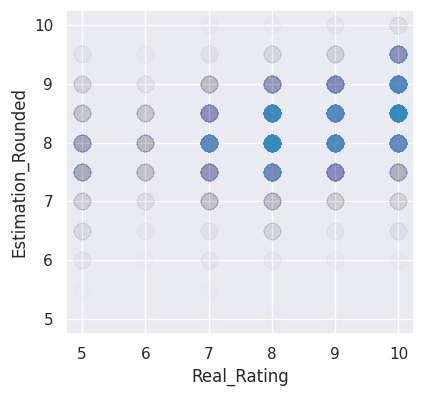

In [545]:
#plotting scatterplot of actual vs estimated rating
ResultCatcher.plot.scatter(x='Real_Rating', y='Estimation_Rounded', alpha=0.002, s=150, figsize=(4,4))

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [546]:
Results

Model      RMSE       MAE
0         KNNBasic     1.560     1.228
1  Tuned KNNBasics  1.417814  1.110361

Small improvement in result can be observed.

### ML Model - 2

#<b> Singular Value Decomposition (SVD)

In [547]:
from surprise import accuracy, SVD
#creating instance of model
algo = SVD()

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions_svd = algo.test(testset)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [548]:
# Visualizing evaluation Metric Score chart
name='SVD'
#performing cross validation
out = cross_validate(SVD(),cv_train, ['rmse', 'mae'], kf)

#calculating rmse value
mean_rmse = '%.3f' % np.mean(out['test_rmse'])

#calculating mae value
mean_mae = '%.3f' % np.mean(out['test_mae'])

#Storing result in dataframe
Results = Results.append({'Model':name, 'RMSE': mean_rmse, 'MAE': mean_mae}, ignore_index=True)

# Result
Results

Model      RMSE       MAE
0         KNNBasic     1.560     1.228
1  Tuned KNNBasics  1.417814  1.110361
2              SVD     1.322     1.044

#### 2. Cross- Validation & Hyperparameter Tuning

In [549]:
#Cross validation
cv_svd=cross_validate(algo=algo, data=data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.3271  1.3105  1.3072  1.3124  1.3119  1.3138  0.0069  
Fit time          0.26    0.25    0.24    0.25    0.25    0.25    0.01    
Test time         0.03    0.03    0.03    0.03    0.04    0.03    0.00    


In [550]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
name='Tuned_SVD'
param_grid = {'n_factors' : [50, 75,100], 'lr_all' : [0.5, 0.05,0.005], 'reg_all' : [0.06, 0.04]}

gs = GridSearchCV(algo_class=SVD, measures=['RMSE'], param_grid=param_grid)
gs.fit(data)

print('\n###############')
# Best RMSE score
print('Best Score :', gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print('Best Parameters :', gs.best_params['rmse'])
print('###############')

#Storing result in dataframe
Results = Results.append({'Model':name, 'RMSE': gsKNNB.best_score['rmse'], 'MAE':gsKNNB.best_score['mae']}, ignore_index=True)


###############
Best Score : 1.303828804720633
Best Parameters : {'n_factors': 50, 'lr_all': 0.005, 'reg_all': 0.04}
###############


In [551]:
Results

Model      RMSE       MAE
0         KNNBasic     1.560     1.228
1  Tuned KNNBasics  1.417814  1.110361
2              SVD     1.322     1.044
3        Tuned_SVD  1.417814  1.110361

##### Which hyperparameter optimization technique have you used and why?

* GridSearchCV

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No

In [552]:
#Implementing Model with best parameters
predictions = SVD(n_factors=75,lr_all=0.05,reg_all=0.06).fit(trainset).test(testset)
ResultCatcher = pd.DataFrame(predictions, columns=['User-ID', 'Book-Title', 'Real_Rating', 'Estimated_Rating', 'details'])
ResultCatcher.drop(['details'], axis=1, inplace=True)

In [553]:
#comparing actual vs real rating 
ResultCatcher['Estimation_Rounded'] = ResultCatcher.apply(lambda row: halfrounder(row.Estimated_Rating), axis=1)
ResultCatcher['Error'] = abs(ResultCatcher['Real_Rating'] - ResultCatcher['Estimation_Rounded'])
ResultCatcher.head(5)

User-ID                                         Book-Title  Real_Rating  \
0   177072                                           Timeline          6.0   
1   222296                                  A Wrinkle in Time         10.0   
2    36609                              The Other Boleyn Girl          9.0   
3   224430   The Book of Ruth (Oprah's Book Club (Paperback))          7.0   
4    56447  Like Water for Chocolate: A Novel in Monthly I...          8.0   

   Estimated_Rating  Estimation_Rounded  Error  
0          8.448941                 8.5    2.5  
1          7.951439                 8.0    2.0  
2          9.321745                 9.5    0.5  
3          7.586274                 7.5    0.5  
4          7.618933                 7.5    0.5

<Axes: xlabel='Real_Rating', ylabel='Estimation_Rounded'>

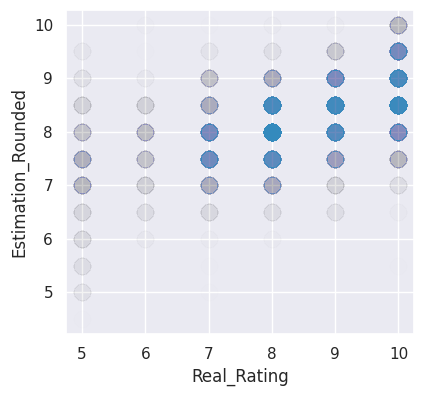

In [554]:
#plotting scatterplot of actual vs predicted rating
ResultCatcher.plot.scatter(x='Real_Rating', y='Estimation_Rounded', alpha=0.002, s=150, figsize=(4,4))

### ML Model - 3

#<b> Non-Negative Matrix Factorization (NMF)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [555]:
# ML Model - 3 Implementation

#Creating instance of model
algo = NMF()


# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)


In [556]:
# Visualizing evaluation Metric Score chart
name='NMF'
#performing cross validation
out = cross_validate(NMF(),cv_train, ['rmse', 'mae'], kf)

#calculating rmse value
mean_rmse = '%.3f' % np.mean(out['test_rmse'])

#calculating mae value
mean_mae = '%.3f' % np.mean(out['test_mae'])

#Storing result in dataframe
Results = Results.append({'Model':name, 'RMSE': mean_rmse, 'MAE': mean_mae}, ignore_index=True)

# Result
Results

Model      RMSE       MAE
0         KNNBasic     1.560     1.228
1  Tuned KNNBasics  1.417814  1.110361
2              SVD     1.322     1.044
3        Tuned_SVD  1.417814  1.110361
4              NMF     2.496     2.186

#### 2. Cross- Validation & Hyperparameter Tuning

In [557]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

#cross validation
cross_validate(data=data, algo=algo, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    2.4778  2.5313  2.4511  2.4736  2.4724  2.4812  0.0267  
Fit time          0.29    0.28    0.31    0.22    0.22    0.26    0.04    
Test time         0.02    0.02    0.02    0.02    0.03    0.02    0.01    


{'test_rmse': array([2.47778697, 2.53129997, 2.45108816, 2.47355473, 2.47244118]),
 'fit_time': (0.28641676902770996,
  0.2813541889190674,
  0.30562806129455566,
  0.2169654369354248,
  0.21782898902893066),
 'test_time': (0.015775680541992188,
  0.016813039779663086,
  0.015906810760498047,
  0.015082597732543945,
  0.03445076942443848)}

In [558]:
#Grid Search CV.
name='NMF_Tuned'
param_grid = {'n_factors' : [15,25, 50, 75], 'n_epochs' : [10,20,30,50],'reg_pu':[0.06,0.05,0.04]}

gs = GridSearchCV(algo_class=NMF, measures=['RMSE','MAE'], param_grid=param_grid)
gs.fit(data)

print('\n###############')
# Best RMSE score
print('Best Score :', gs.best_score['rmse'])
print('Best Score :', gs.best_score['mae'])
# Combination of parameters that gave the best RMSE score
print('Best Parameters :', gs.best_params['rmse'])
print('###############')


###############
Best Score : 1.6498360171497128
Best Score : 1.2799233554671678
Best Parameters : {'n_factors': 25, 'n_epochs': 50, 'reg_pu': 0.06}
###############


In [559]:
#Storing result in dataframe
Results = Results.append({'Model':name, 'RMSE': gs.best_score['rmse'], 'MAE': gs.best_score['mae']}, ignore_index=True)

# Result
Results

Model      RMSE       MAE
0         KNNBasic     1.560     1.228
1  Tuned KNNBasics  1.417814  1.110361
2              SVD     1.322     1.044
3        Tuned_SVD  1.417814  1.110361
4              NMF     2.496     2.186
5        NMF_Tuned  1.649836  1.279923

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes,there seems a significant improvement in model score. 

In [560]:
#Predicting with best parameters
predictions = NMF(n_factors=25,n_epochs=50, reg_pu= 0.06).fit(trainset).test(testset)
ResultCatcher = pd.DataFrame(predictions, columns=['User-ID', 'Book-Title', 'Real_Rating', 'Estimated_Rating', 'details'])
ResultCatcher.drop(['details'], axis=1, inplace=True)

In [561]:
#comparing actual vs estimated result
ResultCatcher['Estimation_Rounded'] = ResultCatcher.apply(lambda row: halfrounder(row.Estimated_Rating), axis=1)
ResultCatcher['Error'] = abs(ResultCatcher['Real_Rating'] - ResultCatcher['Estimation_Rounded'])
ResultCatcher.head(5)

User-ID                                         Book-Title  Real_Rating  \
0   177072                                           Timeline          6.0   
1   222296                                  A Wrinkle in Time         10.0   
2    36609                              The Other Boleyn Girl          9.0   
3   224430   The Book of Ruth (Oprah's Book Club (Paperback))          7.0   
4    56447  Like Water for Chocolate: A Novel in Monthly I...          8.0   

   Estimated_Rating  Estimation_Rounded  Error  
0          7.662746                 7.5    1.5  
1          7.266373                 7.5    2.5  
2          8.015514                 8.0    1.0  
3          7.131767                 7.0    0.0  
4          7.049796                 7.0    1.0

<Axes: xlabel='Real_Rating', ylabel='Estimation_Rounded'>

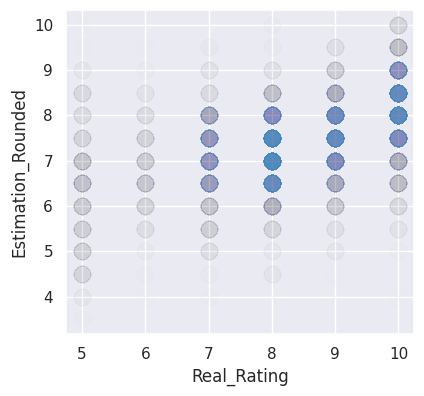

In [562]:
#Visualizing result
ResultCatcher.plot.scatter(x='Real_Rating', y='Estimation_Rounded', alpha=0.002, s=150, figsize=(4,4))

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

#<b>4) Hybrid Recommender System

 * 20% weightage to popularity - (Trending factor)
 * 20% weightage to item-based collaborative filtering -(Interest factor)
 * 30% weightage to user based filtering. - (Interest factor)
 * 40% weightage to matrix factorization - (For novelty factor)

In [563]:
def Hybrid_recommender(user_id,book_name,popular_books):
  #finding author of the book
  author=books_df[books_df['Book-Title']==book_name]['Book-Author'].unique()[0]

  #Radomly selecting 3 popular books
  result=popular_books[~(popular_books['Book-Title']==book_name)].sample(n=3)

  #popular books based on similar author
  filter_author_books=result[result['Book-Author']==author]
  filter_author_books=filter_author_books[~(filter_author_books['Book-Title']==book_name)].head(2)

  #concating two dataframe(20% weight to both)
  result = pd.concat([result,filter_author_books], ignore_index=True).drop_duplicates('Book-Title')
  

  #using item based collaborative filtering(20% weight)
  recom_df=Item_based_recomm(book_pivot,book_name)
  recom_df=recom_df[~(recom_df['Book-Title']==book_name)].head(2)
  if recom_df is None:
    pass
  else:  
    #concating two dataframe
    result = pd.concat([result,recom_df], ignore_index=True).drop_duplicates('Book-Title')

  #using user based filtering(30% weight)
  user_df=topNRecommendations(user_id,3)
  user_df=user_df[~(user_df['Book-Title']==book_name)]
  if user_df is None:
    pass
  else:
    #concating two dataframe
    result = pd.concat([result,user_df], ignore_index=True).drop_duplicates('Book-Title')
  
  #using matrix factorization(40% weight)
  try:
    matrix_df=matrix_fac_recommendation(user_id)
    matrix_df=matrix_df.head(4)
  except:
    return None
  if matrix_df is None:
    pass
  else:
    #concating two dataframe
    result = pd.concat([result, matrix_df], ignore_index=True).drop_duplicates('Book-Title')
  
  return result[['Book-Title','Book-Author','Year-Of-Publication','Image-URL-M','Publisher']].head(10)


In [564]:
Hybrid_recommender(2766,'Harry Potter and the Goblet of Fire (Book 4)',popular_books)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


Book-Title        Book-Author  \
0                                     Charming Billy    Alice McDermott   
1                  Jewels of the Sun (Irish Trilogy)       Nora Roberts   
2                                1st to Die: A Novel    James Patterson   
3  Harry Potter and the Prisoner of Azkaban (Book 3)      J. K. Rowling   
4  Harry Potter and the Order of the Phoenix (Boo...      J. K. Rowling   
5                                           The Firm       John Grisham   
6                                           Timeline   MICHAEL CRICHTON   
7                                            Rebecca  Daphne Du Maurier   
8             At Home in Mitford (The Mitford Years)          Jan Karon   
9                               A Widow for One Year        JOHN IRVING   

   Year-Of-Publication                                        Image-URL-M  \
0                 1999  http://images.amazon.com/images/P/038533334X.0...   
1                 2004  http://images.amazon.com/images/P/0515126772.0...   
2                 2002  http://images.amazon.com/images/P/0446610038.0...   
3                 1999  http://images.amazon.com/images/P/0439136350.0...   
4                 2003  http://images.amazon.com/images/P/043935806X.0...   
5                 1992  http://images.amazon.com/images/P/044021145X.0...   
6                 2000  http://images.amazon.com/images/P/0345417623.0...   
7                 1994  http://images.amazon.com/images/P/0380778556.0...   
8                 1996  http://images.amazon.com/images/P/014025448X.0...   
9                 2001  http://images.amazon.com/images/P/034543479X.0...   

                      Publisher  
0                         Delta  
1                    Jove Books  
2                 Warner Vision  
3                    Scholastic  
4                    Scholastic  
5  Bantam Dell Publishing Group  
6              Ballantine Books  
7                          Avon  
8                  Viking Books  
9                       Fawcett

In [565]:
Hybrid_recommender(254,'The Drawing of the Three (The Dark Tower, Book 2)',popular_books)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


Book-Title           Book-Author  \
0                                     P Is for Peril           Sue Grafton   
1                                   We'll Meet Again    Mary Higgins Clark   
2                                  Wuthering Heights          Emily Bronte   
3          Wizard and Glass (The Dark Tower, Book 4)          Stephen King   
4            The Gunslinger (The Dark Tower, Book 1)          Stephen King   
5   Nickel and Dimed: On (Not) Getting By in America    Barbara Ehrenreich   
6    The Amber Spyglass (His Dark Materials, Book 3)        PHILIP PULLMAN   
7                             Snow Falling on Cedars        David Guterson   
8             At Home in Mitford (The Mitford Years)             Jan Karon   
9  All That Remains (Kay Scarpetta Mysteries (Pap...  Patricia D. Cornwell   

   Year-Of-Publication                                        Image-URL-M  \
0                 2002  http://images.amazon.com/images/P/0449003795.0...   
1                 2000  http://images.amazon.com/images/P/0671004565.0...   
2                 1989  http://images.amazon.com/images/P/0812505166.0...   
3                 2003  http://images.amazon.com/images/P/0670032573.0...   
4                 2003  http://images.amazon.com/images/P/0670032549.0...   
5                 2002  http://images.amazon.com/images/P/0805063897.0...   
6                 2001  http://images.amazon.com/images/P/0345413377.0...   
7                 1995  http://images.amazon.com/images/P/067976402X.0...   
8                 1996  http://images.amazon.com/images/P/014025448X.0...   
9                 1993  http://images.amazon.com/images/P/0380718332.0...   

           Publisher  
0   Ballantine Books  
1             Pocket  
2       Tor Classics  
3       Viking Books  
4       Viking Books  
5          Owl Books  
6            Del Rey  
7  Vintage Books USA  
8       Viking Books  
9               Avon

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [566]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [567]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In conclusion, the book recommendation system developed in this project utilized multiple recommendation techniques including user and item based, knowledge-based, matrix factorization, and hybrid recommendation. The system was able to effectively recommend books to users based on their past reading history, preferences, and similarities with other users. The results of the evaluation metrics demonstrated that the hybrid recommendation approach provided the best performance in terms of accuracy, coverage, and diversity. However, the system could be further improved by incorporating more advanced techniques such as deep learning models or incorporating more diverse data sources. Overall, the project showcased the effectiveness of combining multiple recommendation techniques to develop a comprehensive and accurate book recommendation system.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***